In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [127]:
df = pd.read_csv('C:/Users/vmahin01/Downloads/Sparkling.csv', parse_dates = True, index_col = ['YearMonth'])

In [19]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [21]:
df.shape

(187, 1)

In [22]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [23]:
df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


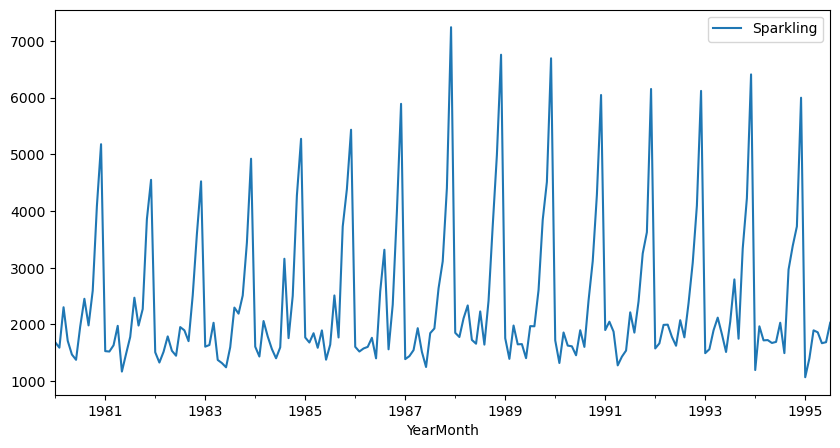

In [24]:
rcParams['figure.figsize'] = 10,5
df.plot()
plt.show()

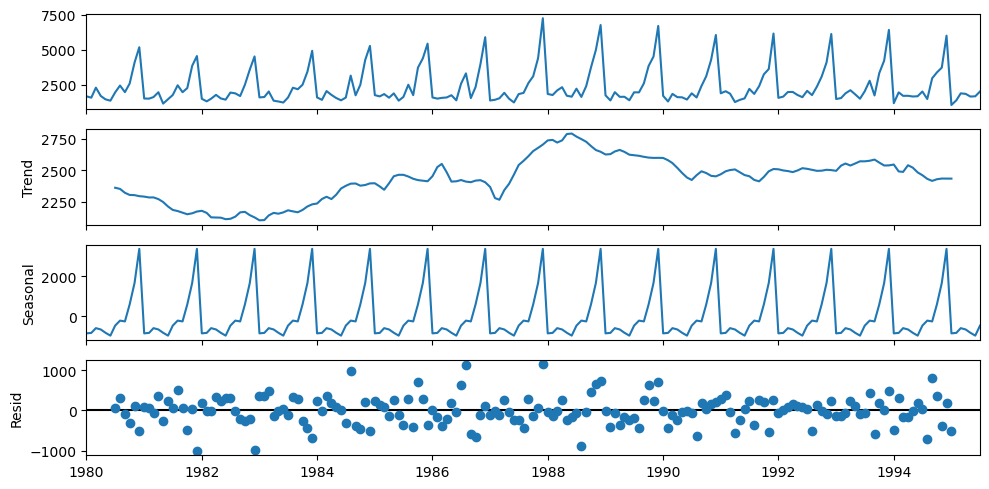

In [25]:
df_decompose = seasonal_decompose(df,model = 'additive')
df_decompose.plot()
plt.show()

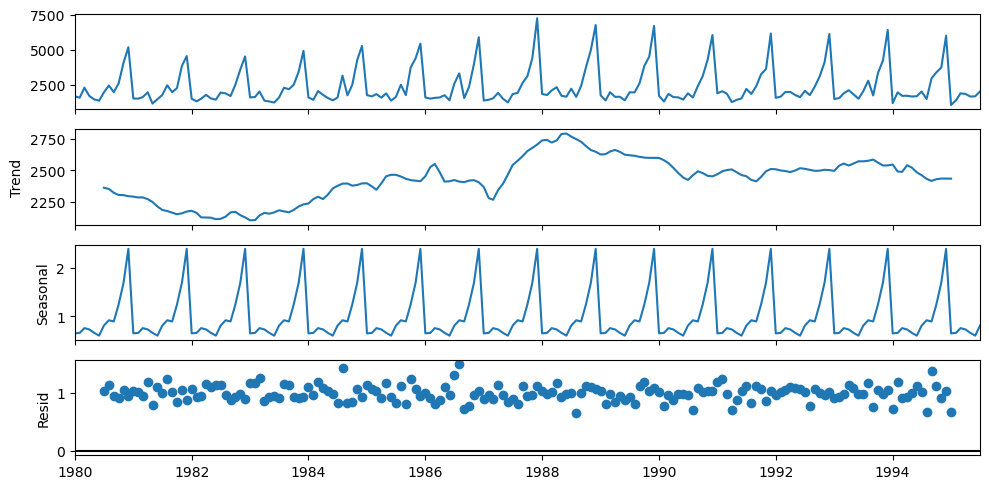

In [26]:
df_decompose = seasonal_decompose(df,model = 'multiplicative')
df_decompose.plot()
plt.show()

In [27]:
df_q = df.resample('Q').mean()

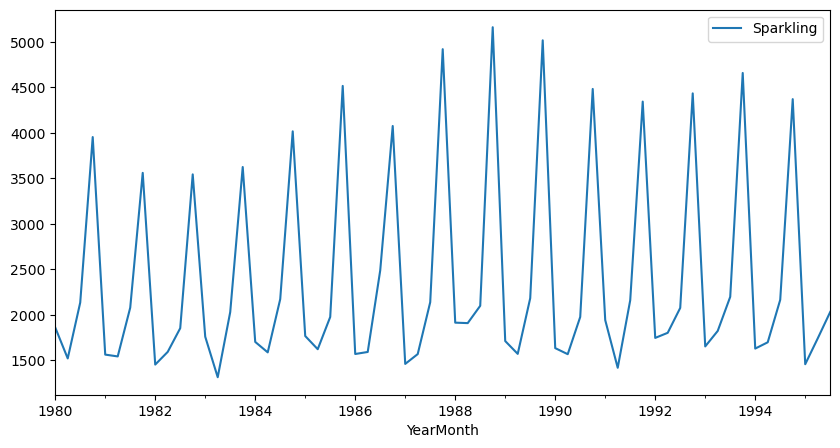

In [28]:
df_q.plot()
plt.show()

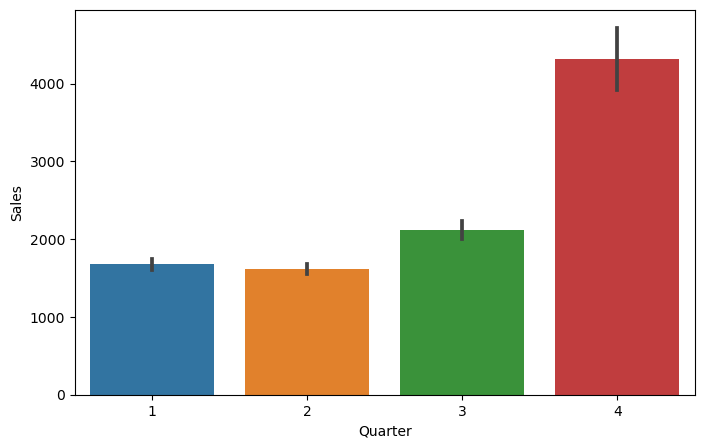

In [129]:
plt.figure(figsize=(8,5))
sns.barplot(x = df.index.quarter, y = 'Sparkling', data = df)
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

In [30]:
quarterly_sales_yearwise = pd.pivot_table(df, values = 'Sparkling', columns = df.index.quarter, index = df.index.year, aggfunc = sum)

In [31]:
quarterly_sales_yearwise

YearMonth,1,2,3,4
YearMonth,,,,
1980,5581.0,4560.0,6403.0,11862.0
1981,4686.0,4626.0,6234.0,10681.0
1982,4357.0,4776.0,5557.0,10631.0
1983,5277.0,3940.0,6089.0,10874.0
1984,5105.0,4760.0,6515.0,12051.0
1985,5299.0,4864.0,5928.0,13549.0
1986,4706.0,4773.0,7464.0,12227.0
1987,4379.0,4703.0,6415.0,14761.0
1988,5740.0,5725.0,6296.0,15485.0


Text(0.5, 1.0, 'Quarter wise yearly sales')

<Figure size 700x300 with 0 Axes>

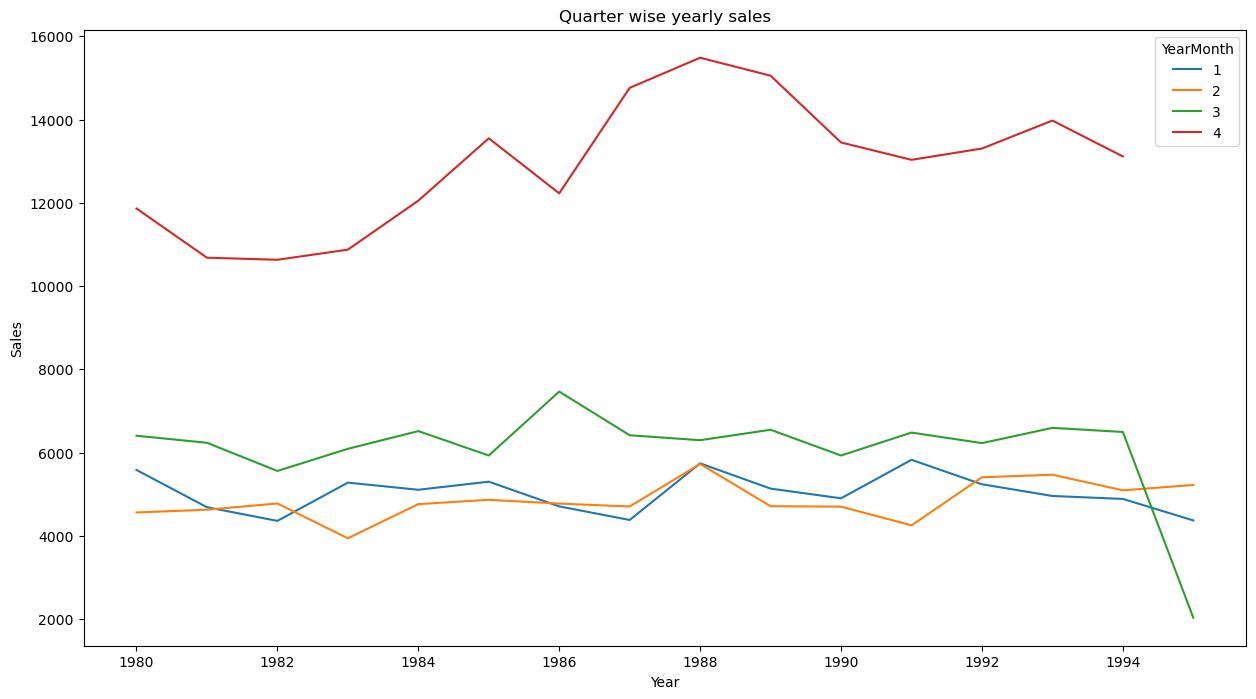

In [133]:
plt.figure(figsize=(7,3))
quarterly_sales_yearwise.plot()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Quarter wise yearly sales')

<Figure size 500x300 with 0 Axes>

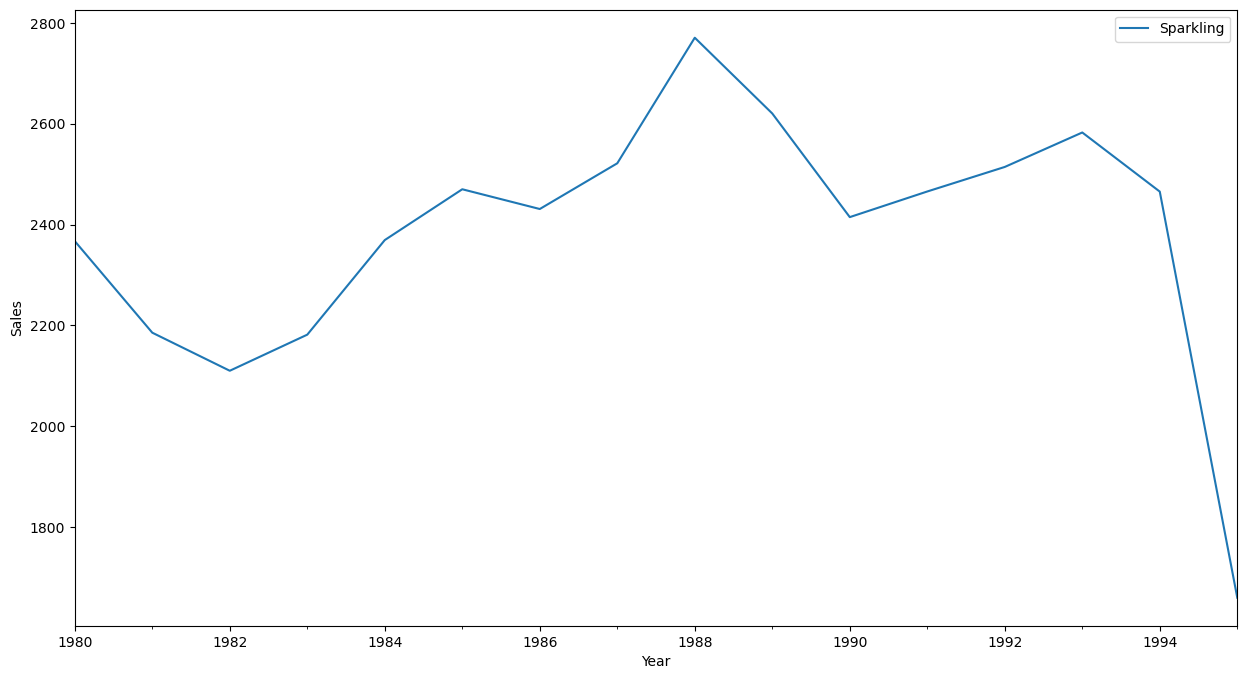

In [136]:
plt.figure(figsize=(5,3))
df_Y = df.resample('Y').mean()
df_Y.plot()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

<Axes: xlabel='YearMonth', ylabel='Sparkling'>

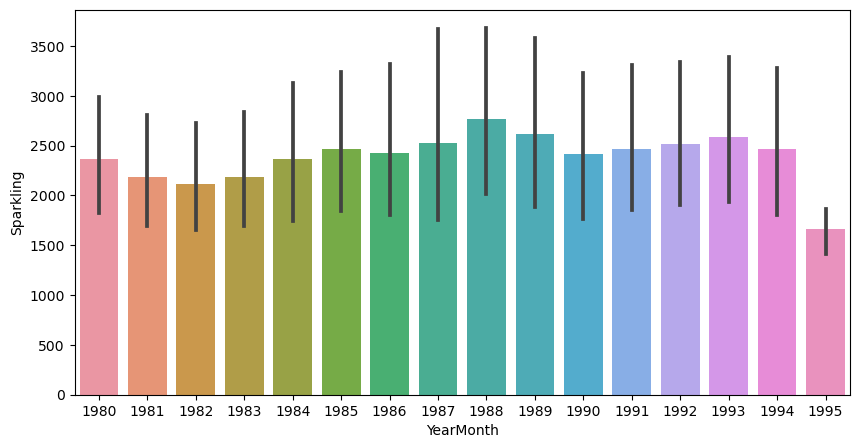

In [34]:
sns.barplot(x = df.index.year, y = 'Sparkling', data = df)

In [35]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [36]:
# Train Test data split

train = df[:int(len(df)*0.7)]
test = df[int(len(df)*0.7):]

In [37]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [38]:
print('First few rows of training data')
display(train.head())
print('Last few rows of training data')
display(train.tail())

First few rows of training data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of training data


,Sparkling
YearMonth,
1990-06-01,1457
1990-07-01,1899
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


In [39]:
print('First few rows of testing data')
display(test.head())
print('Last few rows of testing data')
display(test.tail())

First few rows of testing data


,Sparkling
YearMonth,
1990-11-01,4286
1990-12-01,6047
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874


Last few rows of testing data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


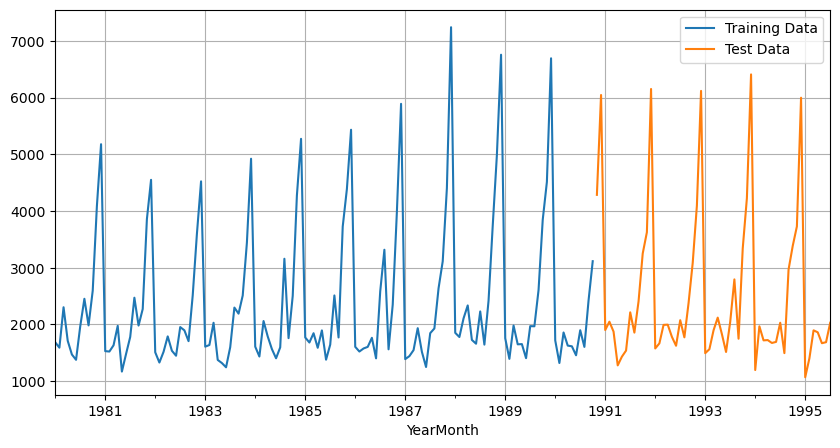

In [40]:
train['Sparkling'].plot()
test['Sparkling'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [41]:
# Model 1 - Linear Regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+131 for i in range(len(test))]
print(train_time)
print(test_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
[131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [42]:
LR_train = train.copy()
LR_test = test.copy()

In [43]:
LR_train['time'] = train_time
LR_test['time'] = test_time


print('First few rows of Training Data')
display(LR_train.head())
print('Last few rows of Training Data')
display(LR_train.tail())
print('First few rows of Test Data')
display(LR_test.head())
print('Last few rows of Test Data')
display(LR_test.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-06-01,1457,126
1990-07-01,1899,127
1990-08-01,1605,128
1990-09-01,2424,129
1990-10-01,3116,130


First few rows of Test Data


,Sparkling,time
YearMonth,,
1990-11-01,4286,131
1990-12-01,6047,132
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-01,1897,183
1995-04-01,1862,184
1995-05-01,1670,185
1995-06-01,1688,186
1995-07-01,2031,187


In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
LR_model = LinearRegression()

In [46]:
LR_model.fit(LR_train[['time']],LR_train['Sparkling'])

LinearRegression()

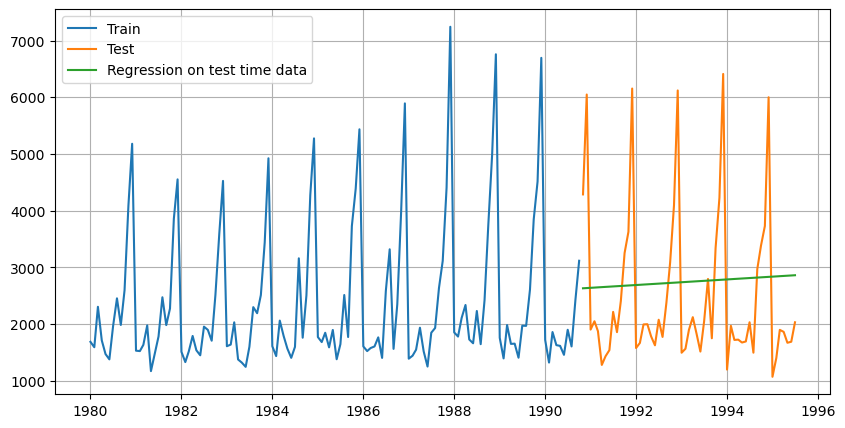

In [47]:
train_pred_LR = LR_model.predict(LR_train[['time']])
LR_train['Regontime'] = train_pred_LR

test_pred_LR = LR_model.predict(LR_test[['time']])
LR_test['Regontime'] = test_pred_LR

plt.plot(train['Sparkling'], label = 'Train')
plt.plot(test['Sparkling'], label = 'Test')
plt.plot(LR_test['Regontime'], label = 'Regression on test time data')

plt.legend(loc = 'best')
plt.grid()
plt.show()


In [48]:
rmse_LR_model = metrics.mean_squared_error(test['Sparkling'],LR_test['Regontime'], squared = False)
print("For Linear Regression model forecast on test data, RMSE is",round(rmse_LR_model,2))

For Linear Regression model forecast on test data, RMSE is 1392.44


In [49]:
Results = pd.DataFrame({'Test RMSE':[rmse_LR_model]}, index=['Regression on Time'])
Results

,Test RMSE
Regression on Time,1392.438305


In [50]:
# Model 2 - Simple Average

SA_train = train.copy()
SA_test = test.copy()

In [51]:
SA_test['Mean_forecast'] = SA_train['Sparkling'].mean()
SA_test

,Sparkling,Mean_forecast
YearMonth,,
1990-11-01,4286,2361.276923
1990-12-01,6047,2361.276923
1991-01-01,1902,2361.276923
1991-02-01,2049,2361.276923
1991-03-01,1874,2361.276923
1991-04-01,1279,2361.276923
1991-05-01,1432,2361.276923
1991-06-01,1540,2361.276923
1991-07-01,2214,2361.276923


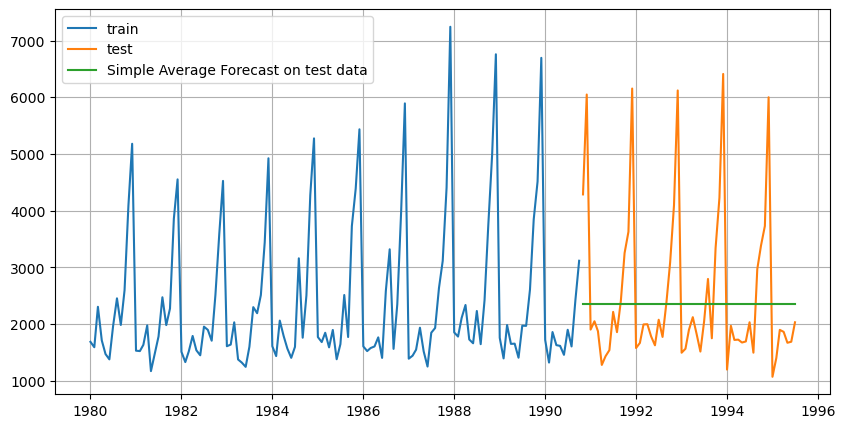

In [52]:
plt.plot(SA_train['Sparkling'], label = 'train')
plt.plot(SA_test['Sparkling'], label = 'test')
plt.plot(SA_test['Mean_forecast'], label = 'Simple Average Forecast on test data')

plt.legend(loc = 'best')
plt.grid()

In [53]:
rmse_SA_model = metrics.mean_squared_error(SA_test['Sparkling'],SA_test['Mean_forecast'], squared = False)
print("For Simple Average model forecast on test data, RMSE is",round(rmse_SA_model,2))

For Simple Average model forecast on test data, RMSE is 1368.75


In [54]:
Results_SA = pd.DataFrame({'Test RMSE':[rmse_SA_model]}, index=['Simple Average'])
Results = pd.concat([Results,Results_SA])
Results

,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717


In [55]:
# Method3 - Moving Average

MA_data = df.copy()
MA_data.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [56]:
MA_data['Trailing_2'] = MA_data['Sparkling'].rolling(2).mean()
MA_data['Trailing_4'] = MA_data['Sparkling'].rolling(4).mean()
MA_data['Trailing_5'] = MA_data['Sparkling'].rolling(5).mean()
MA_data['Trailing_6'] = MA_data['Sparkling'].rolling(6).mean()
MA_data['Trailing_8'] = MA_data['Sparkling'].rolling(8).mean()

In [57]:
MA_data

,Sparkling,Trailing_2,Trailing_4,Trailing_5,Trailing_6,Trailing_8
YearMonth,,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN,NaN
1980-05-01,1471,1591.5,1769.50,1752.8,NaN,NaN
...,...,...,...,...,...,...
1995-03-01,1897,1649.5,2592.00,2819.4,2913.666667,2743.125
1995-04-01,1862,1879.5,1557.75,2446.0,2659.833333,2789.000
1995-05-01,1670,1766.0,1707.75,1580.2,2316.666667,2626.750


In [58]:
MA_train = MA_data[:int(len(MA_data)*0.7)]
MA_test  = MA_data[int(len(MA_data)*0.7):]

In [59]:
MA_train

,Sparkling,Trailing_2,Trailing_4,Trailing_5,Trailing_6,Trailing_8
YearMonth,,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN,NaN
1980-05-01,1471,1591.5,1769.50,1752.8,NaN,NaN
...,...,...,...,...,...,...
1990-06-01,1457,1536.0,1639.75,1576.0,1600.000000,2601.000
1990-07-01,1899,1678.0,1649.75,1691.6,1629.833333,2274.125
1990-08-01,1605,1752.0,1644.00,1640.8,1677.166667,1638.000


In [60]:
MA_test

,Sparkling,Trailing_2,Trailing_4,Trailing_5,Trailing_6,Trailing_8
YearMonth,,,,,,
1990-11-01,4286,3701.0,2857.75,2666.0,2464.500000,2253.750
1990-12-01,6047,5166.5,3968.25,3495.6,3229.500000,2806.125
1991-01-01,1902,3974.5,3837.75,3555.0,3230.000000,2842.000
1991-02-01,2049,1975.5,3571.00,3480.0,3304.000000,2916.000
1991-03-01,1874,1961.5,2968.00,3231.6,3212.333333,2912.875
1991-04-01,1279,1576.5,1776.00,2630.2,2906.166667,2872.125
1991-05-01,1432,1355.5,1658.50,1707.2,2430.500000,2748.125
1991-06-01,1540,1486.0,1531.25,1634.8,1679.333333,2551.125
1991-07-01,2214,1877.0,1616.25,1667.8,1731.333333,2292.125


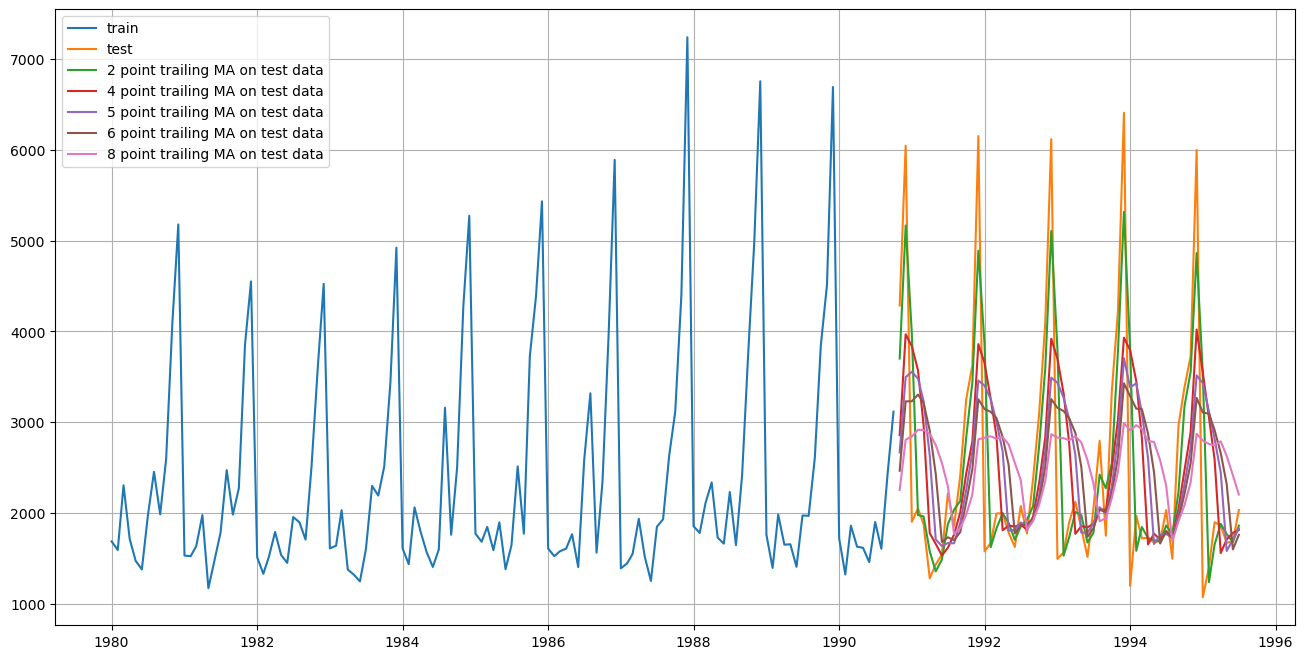

In [61]:
plt.figure(figsize = (16,8))
plt.plot(MA_train['Sparkling'], label = 'train')
plt.plot(MA_test['Sparkling'], label = 'test')
plt.plot(MA_test['Trailing_2'], label = '2 point trailing MA on test data')
plt.plot(MA_test['Trailing_4'], label = '4 point trailing MA on test data')
plt.plot(MA_test['Trailing_5'], label = '5 point trailing MA on test data')
plt.plot(MA_test['Trailing_6'], label = '6 point trailing MA on test data')
plt.plot(MA_test['Trailing_8'], label = '8 point trailing MA on test data')

plt.legend(loc='best')
plt.grid();


In [62]:
rmse_MA_model_2 = metrics.mean_squared_error(MA_test['Sparkling'],MA_test['Trailing_2'], squared = False)
print("For 2 point trailing Moving Average model forecast on test data, RMSE is",round(rmse_MA_model_2))

rmse_MA_model_4 = metrics.mean_squared_error(MA_test['Sparkling'],MA_test['Trailing_4'], squared = False)
print("For 4 point trailing Moving Average model forecast on test data, RMSE is",round(rmse_MA_model_4))

rmse_MA_model_5 = metrics.mean_squared_error(MA_test['Sparkling'],MA_test['Trailing_5'], squared = False)
print("For 5 point trailing Moving Average model forecast on test data, RMSE is",round(rmse_MA_model_5))

rmse_MA_model_6 = metrics.mean_squared_error(MA_test['Sparkling'],MA_test['Trailing_6'], squared = False)
print("For 6 point trailing Moving Average model forecast on test data, RMSE is",round(rmse_MA_model_6))

rmse_MA_model_8 = metrics.mean_squared_error(MA_test['Sparkling'],MA_test['Trailing_8'], squared = False)
print("For 8 point trailing Moving Average model forecast on test data, RMSE is",round(rmse_MA_model_8))

For 2 point trailing Moving Average model forecast on test data, RMSE is 811
For 4 point trailing Moving Average model forecast on test data, RMSE is 1184
For 5 point trailing Moving Average model forecast on test data, RMSE is 1277
For 6 point trailing Moving Average model forecast on test data, RMSE is 1337
For 8 point trailing Moving Average model forecast on test data, RMSE is 1413


In [63]:
MA_results = pd.DataFrame({'Test RMSE': [rmse_MA_model_2,rmse_MA_model_4,rmse_MA_model_5,rmse_MA_model_6,rmse_MA_model_8]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage','5pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

Results = pd.concat([Results, MA_results])
Results

,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236


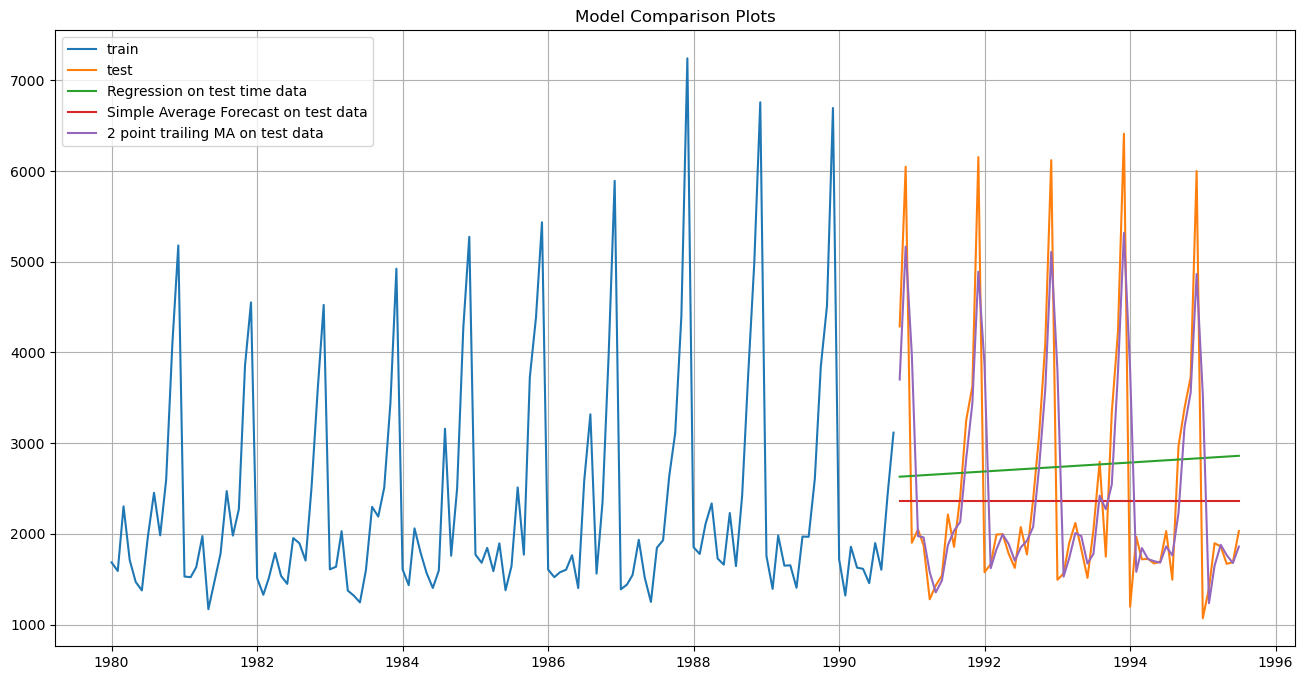

In [64]:
plt.figure(figsize = (16,8))
plt.plot(MA_train['Sparkling'], label = 'train')
plt.plot(MA_test['Sparkling'], label = 'test')
plt.plot(LR_test['Regontime'], label = 'Regression on test time data')
plt.plot(SA_test['Mean_forecast'], label = 'Simple Average Forecast on test data')
plt.plot(MA_test['Trailing_2'], label = '2 point trailing MA on test data')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Exponential Smoothing - Single/Double/Triple

Beginning with Single Exponential Smoothing

In [65]:
SES_train = train.copy()
SES_test =test.copy()

In [66]:
SES_train

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1990-06-01,1457
1990-07-01,1899
1990-08-01,1605


In [67]:
SES_test

,Sparkling
YearMonth,
1990-11-01,4286
1990-12-01,6047
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432
1991-06-01,1540
1991-07-01,2214


In [68]:
SES_model = SimpleExpSmoothing(SES_train,initialization_method = 'estimated')


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
SES_model_autofit = SES_model.fit(optimized=True)

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [70]:
SES_model_autofit.params

{'smoothing_level': 0.06994372349861198,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1759.087234144848,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [71]:
SES_model_predict = SES_model_autofit.forecast(steps=len(SES_test))
SES_model_predict

1990-11-01    2429.632253
1990-12-01    2429.632253
1991-01-01    2429.632253
1991-02-01    2429.632253
1991-03-01    2429.632253
1991-04-01    2429.632253
1991-05-01    2429.632253
1991-06-01    2429.632253
1991-07-01    2429.632253
1991-08-01    2429.632253
1991-09-01    2429.632253
1991-10-01    2429.632253
1991-11-01    2429.632253
1991-12-01    2429.632253
1992-01-01    2429.632253
1992-02-01    2429.632253
1992-03-01    2429.632253
1992-04-01    2429.632253
1992-05-01    2429.632253
1992-06-01    2429.632253
1992-07-01    2429.632253
1992-08-01    2429.632253
1992-09-01    2429.632253
1992-10-01    2429.632253
1992-11-01    2429.632253
1992-12-01    2429.632253
1993-01-01    2429.632253
1993-02-01    2429.632253
1993-03-01    2429.632253
1993-04-01    2429.632253
1993-05-01    2429.632253
1993-06-01    2429.632253
1993-07-01    2429.632253
1993-08-01    2429.632253
1993-09-01    2429.632253
1993-10-01    2429.632253
1993-11-01    2429.632253
1993-12-01    2429.632253
1994-01-01  

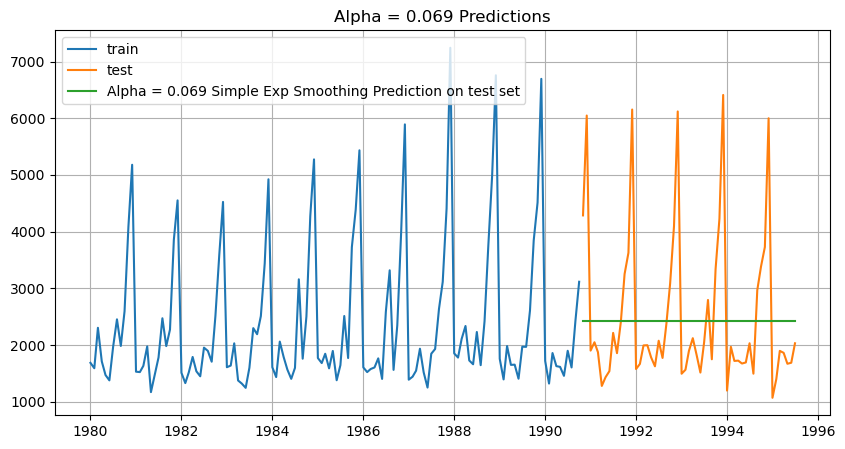

In [72]:
plt.plot(SES_train, label = 'train')
plt.plot(SES_test, label = 'test')
plt.plot(SES_model_predict, label = 'Alpha = 0.069 Simple Exp Smoothing Prediction on test set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.069 Predictions');

In [73]:
rmse_SES_model = metrics.mean_squared_error(SES_test,SES_model_predict, squared = False)
print("For alpha 0.068 SES model forecast on test data, RMSE is",round(rmse_SES_model))

For alpha 0.068 SES model forecast on test data, RMSE is 1364


In [74]:
SES_results = pd.DataFrame({'Test RMSE': [rmse_SES_model]}
                           ,index=['alpha 0.068 SES model'])

Results = pd.concat([Results, SES_results])
Results

,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236
alpha 0.068 SES model,1363.703915


In [75]:
DES_train = train.copy()
DES_test = test.copy()

In [76]:
DES_model = Holt(DES_train,initialization_method = 'estimated')


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
DES_model = DES_model.fit()
print(DES_model.params)

{'smoothing_level': 0.07568138503984535, 'smoothing_trend': 0.07564849865549998, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.5972125731676, 'initial_trend': 6.84852094706126, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [78]:
DES_model_predict = DES_model.forecast(len(DES_test))
DES_model_predict

1990-11-01    2409.794433
1990-12-01    2393.482643
1991-01-01    2377.170853
1991-02-01    2360.859063
1991-03-01    2344.547273
1991-04-01    2328.235483
1991-05-01    2311.923693
1991-06-01    2295.611903
1991-07-01    2279.300112
1991-08-01    2262.988322
1991-09-01    2246.676532
1991-10-01    2230.364742
1991-11-01    2214.052952
1991-12-01    2197.741162
1992-01-01    2181.429372
1992-02-01    2165.117582
1992-03-01    2148.805792
1992-04-01    2132.494002
1992-05-01    2116.182212
1992-06-01    2099.870422
1992-07-01    2083.558632
1992-08-01    2067.246842
1992-09-01    2050.935051
1992-10-01    2034.623261
1992-11-01    2018.311471
1992-12-01    2001.999681
1993-01-01    1985.687891
1993-02-01    1969.376101
1993-03-01    1953.064311
1993-04-01    1936.752521
1993-05-01    1920.440731
1993-06-01    1904.128941
1993-07-01    1887.817151
1993-08-01    1871.505361
1993-09-01    1855.193571
1993-10-01    1838.881781
1993-11-01    1822.569990
1993-12-01    1806.258200
1994-01-01  

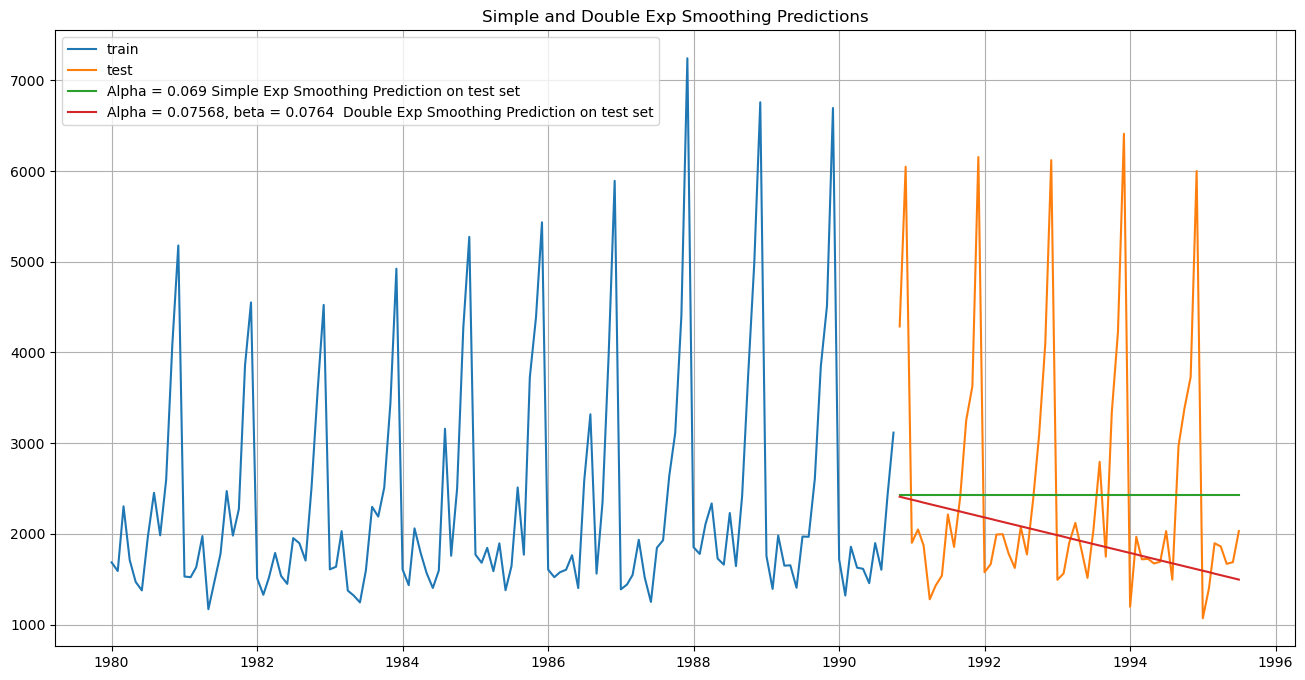

In [79]:
rcParams['figure.figsize'] = 16,8
plt.plot(DES_train, label = 'train')
plt.plot(DES_test, label = 'test')
plt.plot(SES_model_predict, label = 'Alpha = 0.069 Simple Exp Smoothing Prediction on test set')
plt.plot(DES_model_predict, label = 'Alpha = 0.07568, beta = 0.0764  Double Exp Smoothing Prediction on test set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exp Smoothing Predictions');

In [80]:
rmse_DES_model = metrics.mean_squared_error(DES_test,DES_model_predict, squared = False)
print("DES model forecast on test data, RMSE is",round(rmse_DES_model))

DES model forecast on test data, RMSE is 1468


In [81]:
DES_results = pd.DataFrame({'Test RMSE': [rmse_DES_model]}
                           ,index=['DES model'])

Results = pd.concat([Results, DES_results])
Results

,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236
alpha 0.068 SES model,1363.703915
DES model,1468.015409


In [82]:
# Triple Exponential Smoothing with additive method

TES_model_add = ExponentialSmoothing(train,trend = 'additive', seasonal = 'additive', initialization_method = 'estimated')
TES_model_add = TES_model_add.fit()
print(TES_model_add.params)

{'smoothing_level': 0.06871144338895409, 'smoothing_trend': 0.026504879393175, 'smoothing_seasonal': 0.5279825493698512, 'damping_trend': nan, 'initial_level': 2318.8465265203367, 'initial_trend': -0.22585722041700507, 'initial_seasons': array([-694.21346809, -768.46706141, -292.04002651, -517.63405066,
       -880.56455792, -884.72649017, -399.20282583,  128.67427419,
       -329.04495616,  240.07356474, 1673.52542837, 2686.01941002]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
TES_model_add_pred = TES_model_add.forecast(len(test))
TES_model_add_pred

1990-11-01    4512.022761
1990-12-01    6590.554415
1991-01-01    1634.403786
1991-02-01    1322.532231
1991-03-01    1818.597200
1991-04-01    1657.713645
1991-05-01    1575.364494
1991-06-01    1394.004132
1991-07-01    1906.888227
1991-08-01    1736.013764
1991-09-01    2420.454068
1991-10-01    3586.345675
1991-11-01    4515.395104
1991-12-01    6593.926758
1992-01-01    1637.776129
1992-02-01    1325.904574
1992-03-01    1821.969543
1992-04-01    1661.085988
1992-05-01    1578.736837
1992-06-01    1397.376475
1992-07-01    1910.260570
1992-08-01    1739.386107
1992-09-01    2423.826411
1992-10-01    3589.718018
1992-11-01    4518.767447
1992-12-01    6597.299101
1993-01-01    1641.148472
1993-02-01    1329.276917
1993-03-01    1825.341886
1993-04-01    1664.458331
1993-05-01    1582.109180
1993-06-01    1400.748818
1993-07-01    1913.632913
1993-08-01    1742.758450
1993-09-01    2427.198754
1993-10-01    3593.090361
1993-11-01    4522.139790
1993-12-01    6600.671444
1994-01-01  

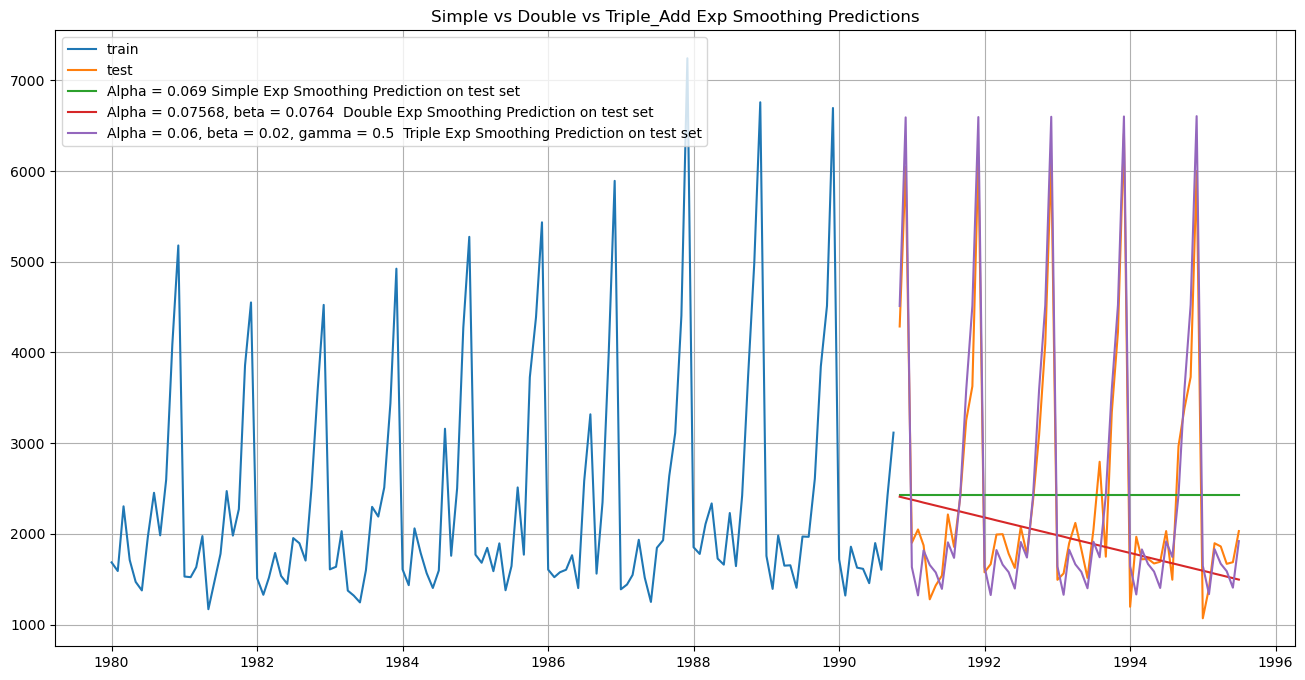

In [84]:
rcParams['figure.figsize'] = 16,8
plt.plot(train, label = 'train')
plt.plot(test, label = 'test')
plt.plot(SES_model_predict, label = 'Alpha = 0.069 Simple Exp Smoothing Prediction on test set')
plt.plot(DES_model_predict, label = 'Alpha = 0.07568, beta = 0.0764  Double Exp Smoothing Prediction on test set')
plt.plot(TES_model_add_pred, label = 'Alpha = 0.06, beta = 0.02, gamma = 0.5  Triple Exp Smoothing Prediction on test set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple vs Double vs Triple_Add Exp Smoothing Predictions');

In [85]:
rmse_TES_model_add = metrics.mean_squared_error(test,TES_model_add_pred, squared = False)
print("TES model forecast on test data, RMSE is",round(rmse_TES_model_add))

TES_results = pd.DataFrame({'Test RMSE': [rmse_TES_model_add]}
                           ,index=['TES model add'])

Results = pd.concat([Results, TES_results])
Results

TES model forecast on test data, RMSE is 377


,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236
alpha 0.068 SES model,1363.703915
DES model,1468.015409
TES model add,377.435453


In [86]:
# Triple Exponential Smoothing with multiplicative method

TES_model_mult = ExponentialSmoothing(train,trend = 'additive', seasonal = 'multiplicative', initialization_method = 'estimated')
TES_model_mult = TES_model_mult.fit()
print(TES_model_mult.params)

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.07571477801793038, 'smoothing_trend': 0.06489837777631828, 'smoothing_seasonal': 0.37656051925177914, 'damping_trend': nan, 'initial_level': 2356.5416785046673, 'initial_trend': -9.18196615119017, 'initial_seasons': array([0.71187753, 0.6780014 , 0.89663441, 0.79726712, 0.64132661,
       0.64049937, 0.86770501, 1.1135006 , 0.89813412, 1.18645545,
       1.83481782, 2.32894849]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [87]:
TES_model_mult_pred = TES_model_mult.forecast(len(test))
TES_model_mult_pred

1990-11-01    4327.607234
1990-12-01    6208.871973
1991-01-01    1621.599758
1991-02-01    1379.863342
1991-03-01    1791.910257
1991-04-01    1679.443491
1991-05-01    1560.817286
1991-06-01    1371.904508
1991-07-01    1874.426873
1991-08-01    1824.444123
1991-09-01    2288.011133
1991-10-01    3240.919750
1991-11-01    4185.626907
1991-12-01    6004.612585
1992-01-01    1568.105737
1992-02-01    1334.218345
1992-03-01    1732.471160
1992-04-01    1623.580589
1992-05-01    1508.755908
1992-06-01    1326.016805
1992-07-01    1811.555469
1992-08-01    1763.077696
1992-09-01    2210.835993
1992-10-01    3131.294643
1992-11-01    4043.646580
1992-12-01    5800.353196
1993-01-01    1514.611716
1993-02-01    1288.573348
1993-03-01    1673.032063
1993-04-01    1567.717687
1993-05-01    1456.694531
1993-06-01    1280.129102
1993-07-01    1748.684065
1993-08-01    1701.711270
1993-09-01    2133.660853
1993-10-01    3021.669537
1993-11-01    3901.666253
1993-12-01    5596.093808
1994-01-01  

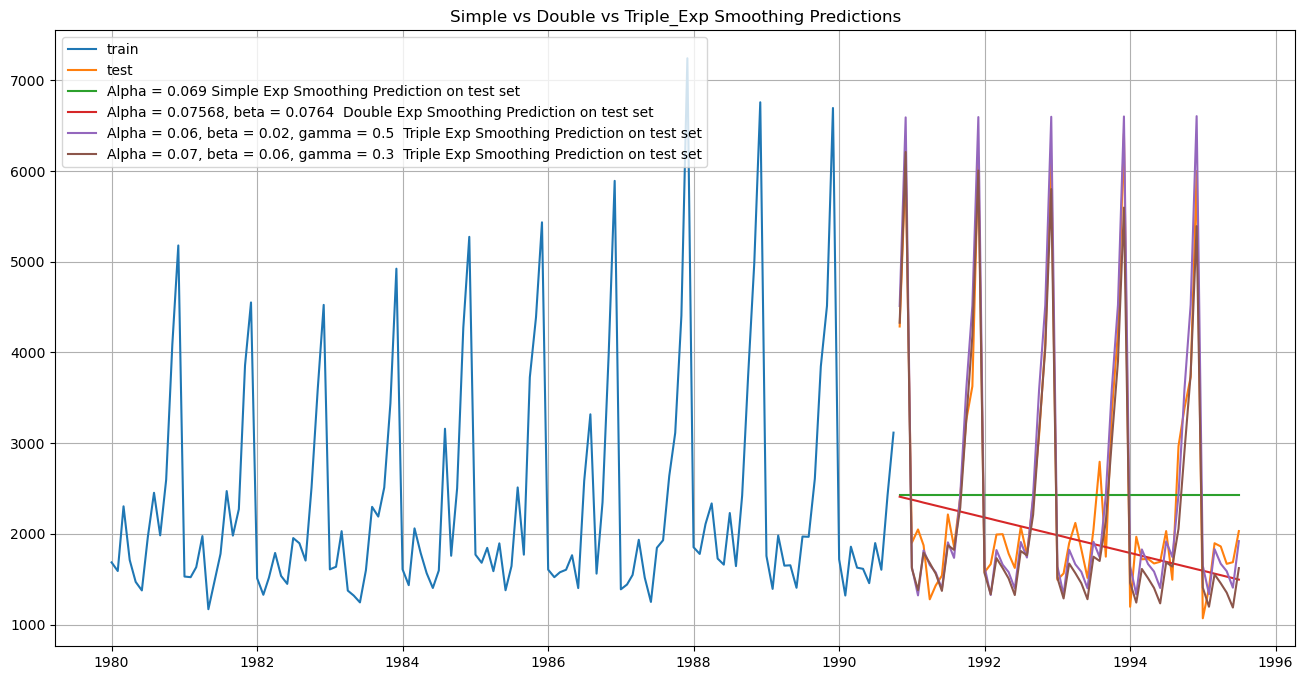

In [88]:
rcParams['figure.figsize'] = 16,8
plt.plot(train, label = 'train')
plt.plot(test, label = 'test')
plt.plot(SES_model_predict, label = 'Alpha = 0.069 Simple Exp Smoothing Prediction on test set')
plt.plot(DES_model_predict, label = 'Alpha = 0.07568, beta = 0.0764  Double Exp Smoothing Prediction on test set')
plt.plot(TES_model_add_pred, label = 'Alpha = 0.06, beta = 0.02, gamma = 0.5  Triple Exp Smoothing Prediction on test set')
plt.plot(TES_model_mult_pred, label = 'Alpha = 0.07, beta = 0.06, gamma = 0.3  Triple Exp Smoothing Prediction on test set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple vs Double vs Triple_Exp Smoothing Predictions');

In [89]:
rmse_TES_model_mult = metrics.mean_squared_error(test,TES_model_mult_pred, squared = False)
print("TES model forecast on test data, RMSE is",round(rmse_TES_model_mult))

TES_results = pd.DataFrame({'Test RMSE': [rmse_TES_model_mult]}
                           ,index=['TES model mult'])

Results = pd.concat([Results, TES_results])
Results

TES model forecast on test data, RMSE is 382


,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236
alpha 0.068 SES model,1363.703915
DES model,1468.015409
TES model add,377.435453


In [90]:
# Checking for Stationarity using Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

train_2= train.copy()
dftest = adfuller(train_2)
dftest
print ('df test statistic is', dftest[0])
print ('df test p-value is', dftest[1])

df test statistic is -1.1559711218878954
df test p-value is 0.6922434759086706


In [91]:
# Since p-value is greater than 0.05, thus it is not a stationary series.

In [92]:
train_2_diff = train_2.diff(periods=1)
train_2_diff

,Sparkling
YearMonth,
1980-01-01,NaN
1980-02-01,-95.0
1980-03-01,713.0
1980-04-01,-592.0
1980-05-01,-241.0
...,...
1990-06-01,-158.0
1990-07-01,442.0
1990-08-01,-294.0


In [93]:
train_2_Diff = train_2_diff.dropna()
train_2_Diff

,Sparkling
YearMonth,
1980-02-01,-95.0
1980-03-01,713.0
1980-04-01,-592.0
1980-05-01,-241.0
1980-06-01,-94.0
...,...
1990-06-01,-158.0
1990-07-01,442.0
1990-08-01,-294.0


In [94]:
train_2_Diff_test = adfuller(train_2_Diff)
train_2_Diff_test
print ('df test statistic is', train_2_Diff_test[0])
print ('df test p-value is', train_2_Diff_test[1])

df test statistic is -7.876510288808894
df test p-value is 4.827962576935798e-12


In [95]:
#Now the series is stationary, therefore value of d=1

Text(0.5, 1.0, 'Stationary Data with differencing of 1')

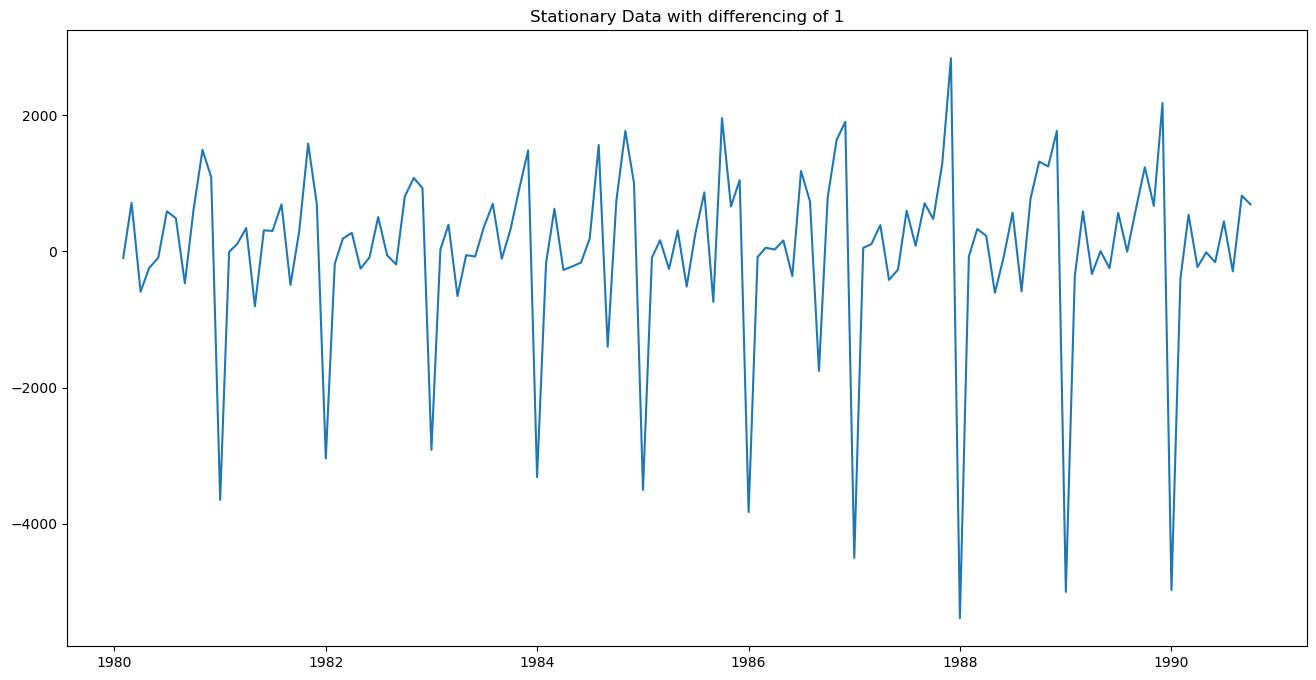

In [96]:
plt.plot(train_2_Diff)
plt.title('Stationary Data with differencing of 1')


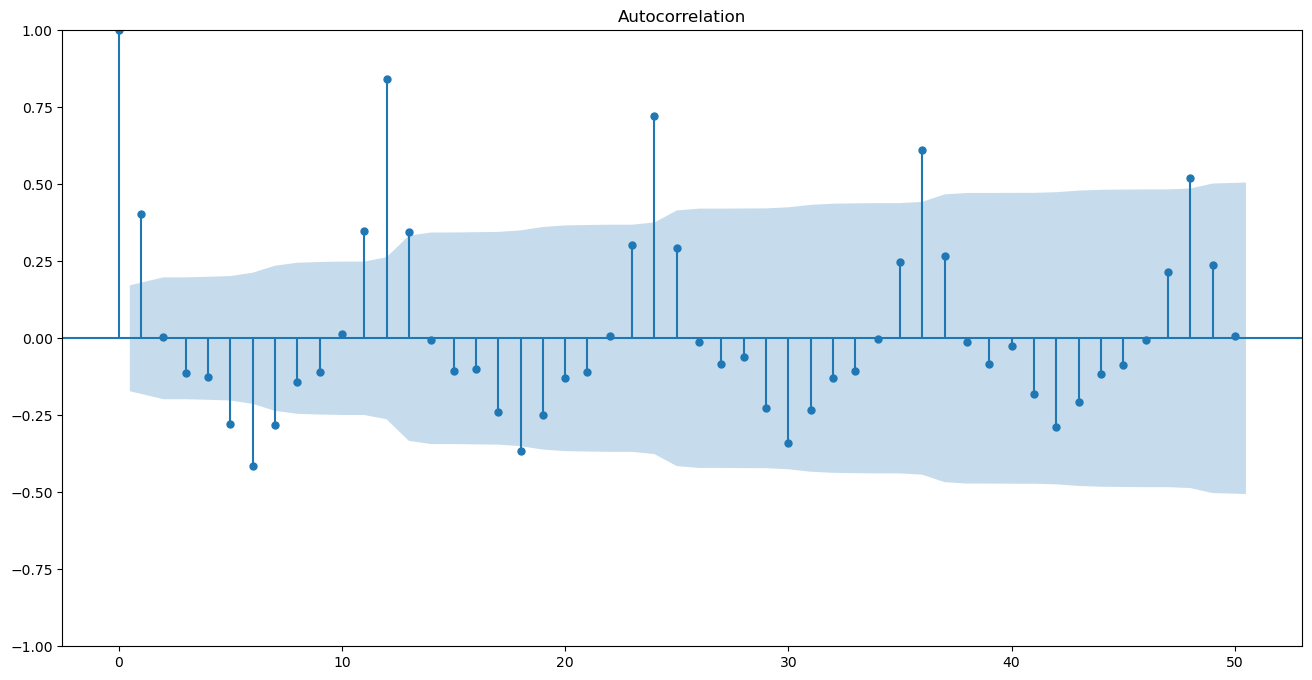

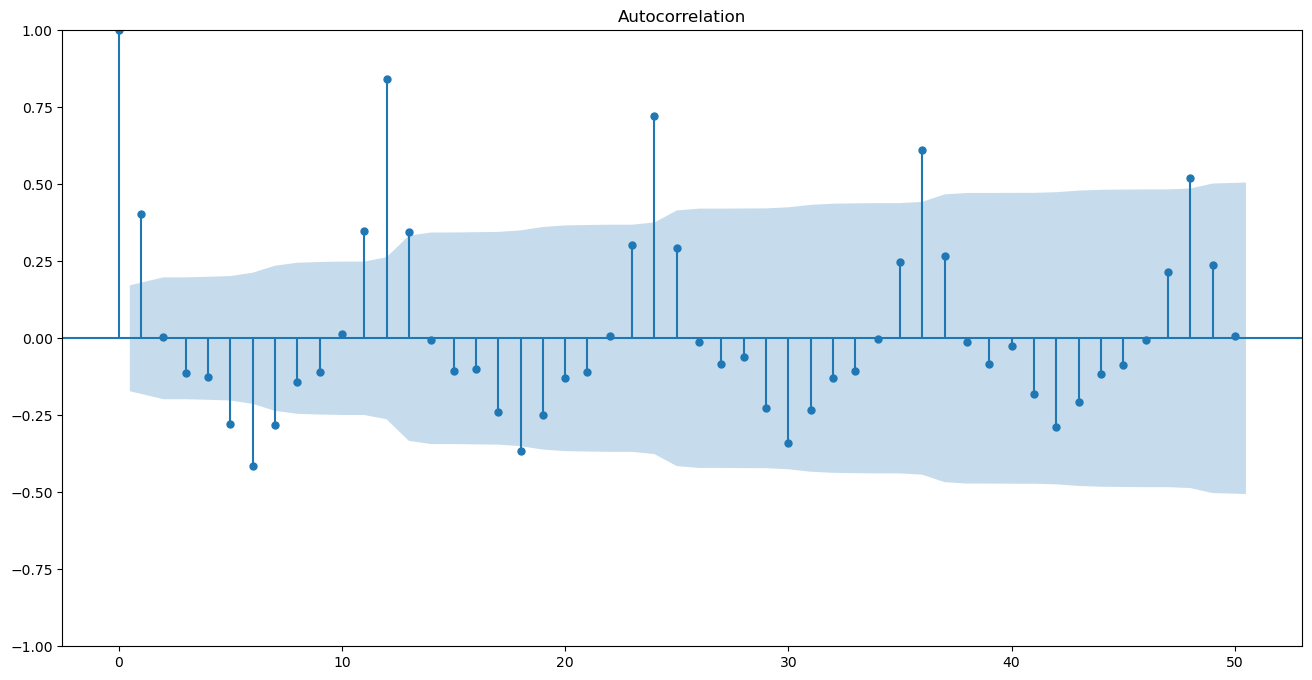

In [97]:
plot_acf(train, lags = 50, alpha = 0.05)

In [98]:
#Significant spikes at lag1 and lag6, thus q= 1 or 6

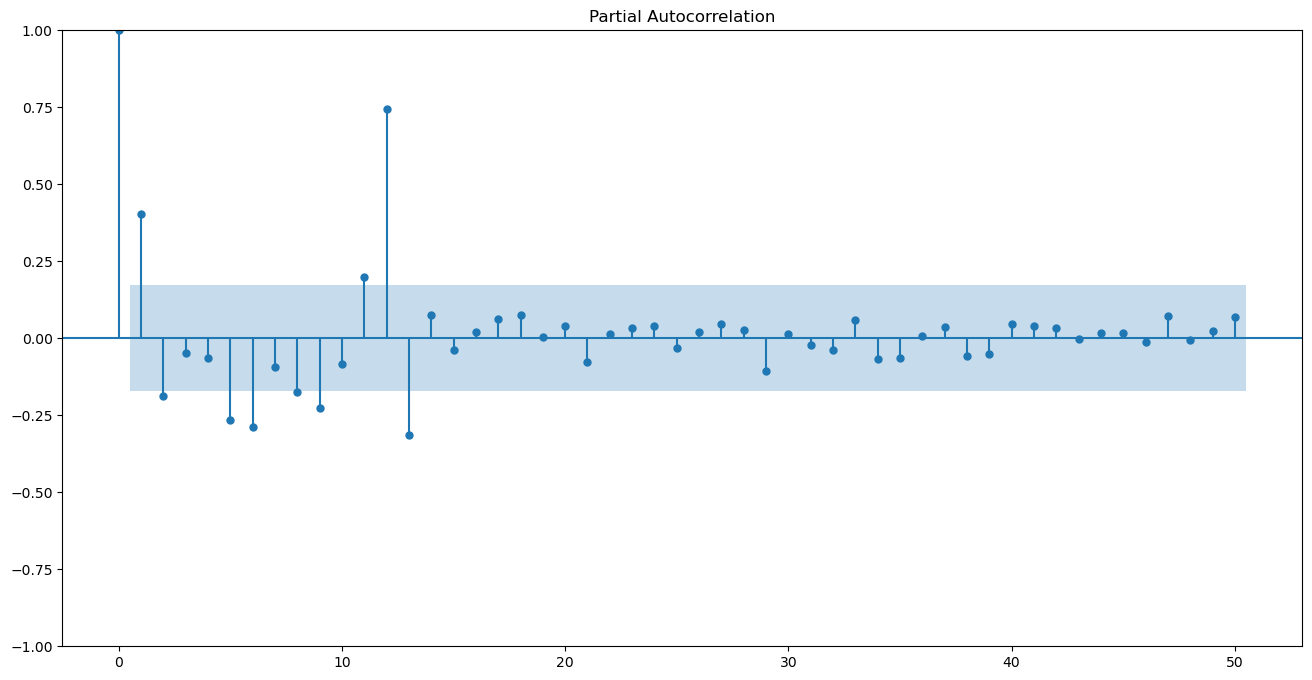

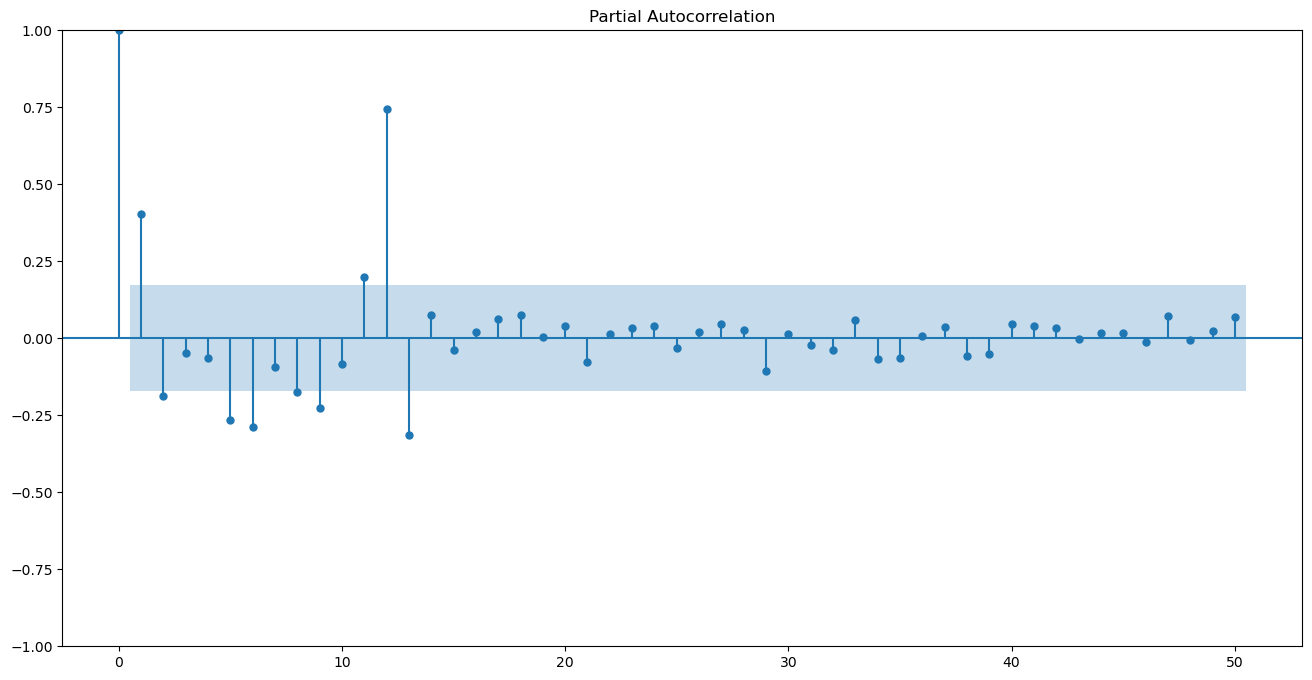

In [99]:
plot_pacf(train, lags = 50, alpha = 0.05)

In [100]:
# Pacf, p value could be 1. Therefore for Manual models we can use p=1, q=1 or 6 and d = 1 and seasonality can be seen on lag 12

from statsmodels.tsa.arima.model import ARIMA

Manual_ARIMA = ARIMA(train,order= (1,1,1))
Manual_ARIMA_results = Manual_ARIMA.fit()

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [101]:
print(Manual_ARIMA_results.summary().tables[0])
print(Manual_ARIMA_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1095.025
Date:                Sat, 20 Apr 2024   AIC                           2196.050
Time:                        14:34:33   BIC                           2204.630
Sample:                    01-01-1980   HQIC                          2199.536
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4166      0.044      9.496      0.000       0.331       0.503
ma.L1         -1.0000      0.096    -10.401      0.000      -1.188      -0.812
sigma2      1.339e+06   7.19e-08   1.86e+13      0.0

In [102]:
Maunal_ARIMA_pred = Manual_ARIMA_results.forecast(steps=len(test))
Maunal_ARIMA_pred

1990-11-01    2666.912448
1990-12-01    2479.830711
1991-01-01    2401.895850
1991-02-01    2369.429598
1991-03-01    2355.904747
1991-04-01    2350.270538
1991-05-01    2347.923429
1991-06-01    2346.945666
1991-07-01    2346.538348
1991-08-01    2346.368666
1991-09-01    2346.297980
1991-10-01    2346.268533
1991-11-01    2346.256267
1991-12-01    2346.251156
1992-01-01    2346.249028
1992-02-01    2346.248141
1992-03-01    2346.247771
1992-04-01    2346.247617
1992-05-01    2346.247553
1992-06-01    2346.247527
1992-07-01    2346.247515
1992-08-01    2346.247511
1992-09-01    2346.247509
1992-10-01    2346.247508
1992-11-01    2346.247508
1992-12-01    2346.247508
1993-01-01    2346.247508
1993-02-01    2346.247508
1993-03-01    2346.247508
1993-04-01    2346.247508
1993-05-01    2346.247508
1993-06-01    2346.247508
1993-07-01    2346.247508
1993-08-01    2346.247508
1993-09-01    2346.247508
1993-10-01    2346.247508
1993-11-01    2346.247508
1993-12-01    2346.247508
1994-01-01  

In [103]:
rmse_manual_arima = metrics.mean_squared_error(test,Maunal_ARIMA_pred, squared = False)
print("Manual ARIMA forecast rmse",round(rmse_manual_arima))

ManualARIMA_results = pd.DataFrame({'Test RMSE': [rmse_manual_arima]}
                           ,index=['Manual ARIMA'])

Results = pd.concat([Results, ManualARIMA_results])
Results

Manual ARIMA forecast rmse 1357


,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236
alpha 0.068 SES model,1363.703915
DES model,1468.015409
TES model add,377.435453


In [104]:
#ARIMA (1,1,6)


Manual_ARIMA2 = ARIMA(train,order= (1,1,6))
Manual_ARIMA2_results = Manual_ARIMA2.fit()
print(Manual_ARIMA2_results.summary().tables[0])
print(Manual_ARIMA2_results.summary().tables[1])

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(1, 1, 6)   Log Likelihood               -1091.677
Date:                Sat, 20 Apr 2024   AIC                           2199.353
Time:                        14:34:44   BIC                           2222.232
Sample:                    01-01-1980   HQIC                          2208.649
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6308      0.441     -1.431      0.152      -1.495       0.233
ma.L1          0.2451      0.769      0.319      0.750      -1.261       1.751
ma.L2         -0.6598      0.684     -0.965      0.3

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [105]:
Maunal_ARIMA2_pred = Manual_ARIMA2_results.forecast(steps=len(test))
rmse_manual_arima2 = metrics.mean_squared_error(test,Maunal_ARIMA2_pred, squared = False)
print("Manual ARIMA2 forecast rmse",round(rmse_manual_arima2))

ManualARIMA2_results = pd.DataFrame({'Test RMSE': [rmse_manual_arima2]}
                           ,index=['Manual ARIMA2'])

Results = pd.concat([Results, ManualARIMA2_results])
Results

Manual ARIMA2 forecast rmse 1351


,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236
alpha 0.068 SES model,1363.703915
DES model,1468.015409
TES model add,377.435453


In [7]:
# Going with Auto ARIMA models now

import itertools

p=range(1,4)
q=range(1,4)
d=range(0,2)

pdq = list(itertools.product(p,d,q))
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [396]:
ARIMA_AIC = pd.DataFrame(columns=['param','AIC'])
ARIMA_AIC

,param,AIC


In [397]:
for param in pdq:
    try:
        ARIMA_model = ARIMA(train,order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
        ARIMA_AIC = ARIMA_AIC.append({'param':param,'AIC':ARIMA_model.aic},ignore_index = True)
    except:
        continue
            

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarn

ARIMA(1, 0, 1) - AIC:2206.1421582379553
ARIMA(1, 0, 2) - AIC:2207.1630481805496


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base

ARIMA(1, 0, 3) - AIC:2201.7129676433096


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) - AIC:2196.050085992837


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2) - AIC:2194.9596533953163
ARIMA(1, 1, 3) - AIC:2195.939240554724


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1) - AIC:2197.0844418704846
ARIMA(2, 0, 2) - AIC:2208.120888693483


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\sta

ARIMA(2, 0, 3) - AIC:2168.1501883772876
ARIMA(2, 1, 1) - AIC:2193.9749624411756
ARIMA(2, 1, 2) - AIC:2178.1097219544345


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

ARIMA(2, 1, 3) - AIC:2193.8242890817655
ARIMA(3, 0, 1) - AIC:2208.6346758606583


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\sta

ARIMA(3, 0, 2) - AIC:2196.166079104883


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

ARIMA(3, 0, 3) - AIC:2171.0344752318433
ARIMA(3, 1, 1) - AIC:2195.7403855348493


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:2191.6278883841496


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:2183.470692853024


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#ARIMA(2,0,3) has lowest value - 2168.15

In [106]:
#Building ARIMA with best parameters (p,d,q)

best_model = ARIMA(train,order = (2,0,3))
best_results = best_model.fit()

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\mod

In [107]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1077.075
Date:                Sat, 20 Apr 2024   AIC                           2168.150
Time:                        14:35:06   BIC                           2188.223
Sample:                    01-01-1980   HQIC                          2176.306
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2363.8112    132.652     17.820      0.000    2103.818    2623.804
ar.L1          1.7074      0.046     37.482      0.000       1.618       1.797
ar.L2         -0.9706      0.046    -20.959      0.0

In [108]:
best_ARIMA_pred = best_results.forecast(steps=len(test))
best_ARIMA_pred

1990-11-01    3810.935497
1990-12-01    3816.497253
1991-01-01    3332.579848
1991-02-01    2607.965519
1991-03-01    1840.427096
1991-04-01    1233.212304
1991-05-01     941.396229
1991-06-01    1032.489813
1991-07-01    1471.251000
1991-08-01    2131.983263
1991-09-01    2834.276038
1991-10-01    3392.091690
1991-11-01    3662.888538
1991-12-01    3583.851741
1992-01-01    3186.076998
1992-02-01    2583.623424
1992-03-01    1941.056090
1992-04-01    1428.652786
1992-05-01    1177.425809
1992-06-01    1245.800630
1992-07-01    1606.377141
1992-08-01    2155.666290
1992-09-01    2743.563610
1992-10-01    3214.222509
1992-11-01    3447.235658
1992-12-01    3388.278148
1993-01-01    3061.458587
1993-02-01    2560.666216
1993-03-01    2022.809328
1993-04-01    1590.520508
1993-05-01    1374.453156
1993-06-01    1425.103319
1993-07-01    1721.291803
1993-08-01    2177.847242
1993-09-01    2669.903128
1993-10-01    3066.925840
1993-11-01    3267.232490
1993-12-01    3223.900503
1994-01-01  

In [109]:
rmse_best_ARIMA = metrics.mean_squared_error(test,best_ARIMA_pred, squared = False)
print("Best ARIMA forecast rmse (2,0,3)",round(rmse_best_ARIMA))

best_ARIMA = pd.DataFrame({'Test RMSE': [rmse_best_ARIMA]}
                           ,index=['Best Arima forecast rmse'])

Results = pd.concat([Results, best_ARIMA])
Results

Best ARIMA forecast rmse (2,0,3) 1047


,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236
alpha 0.068 SES model,1363.703915
DES model,1468.015409
TES model add,377.435453


In [110]:
 ARIMA_model_final = ARIMA(df,order=(2,0,3)).fit()

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [111]:
print(ARIMA_model_final.summary().tables[0])
print(ARIMA_model_final.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  187
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1584.015
Date:                Sat, 20 Apr 2024   AIC                           3182.030
Time:                        14:35:26   BIC                           3204.647
Sample:                    01-01-1980   HQIC                          3191.194
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2402.4598    208.948     11.498      0.000    1992.929    2811.991
ar.L1          0.0004      0.076      0.005      0.996      -0.149       0.149
ar.L2          0.9996      0.073     13.705      0.0

In [112]:
ARIMA_model_final_pred = ARIMA_model_final.forecast(steps = 12)
ARIMA_model_final_pred

1995-08-01    2755.504790
1995-09-01    2191.320529
1995-10-01    2613.513854
1995-11-01    2191.489642
1995-12-01    2613.344809
1996-01-01    2191.658619
1996-02-01    2613.175899
1996-03-01    2191.827461
1996-04-01    2613.007124
1996-05-01    2191.996168
1996-06-01    2612.838485
1996-07-01    2192.164740
Freq: MS, Name: predicted_mean, dtype: float64

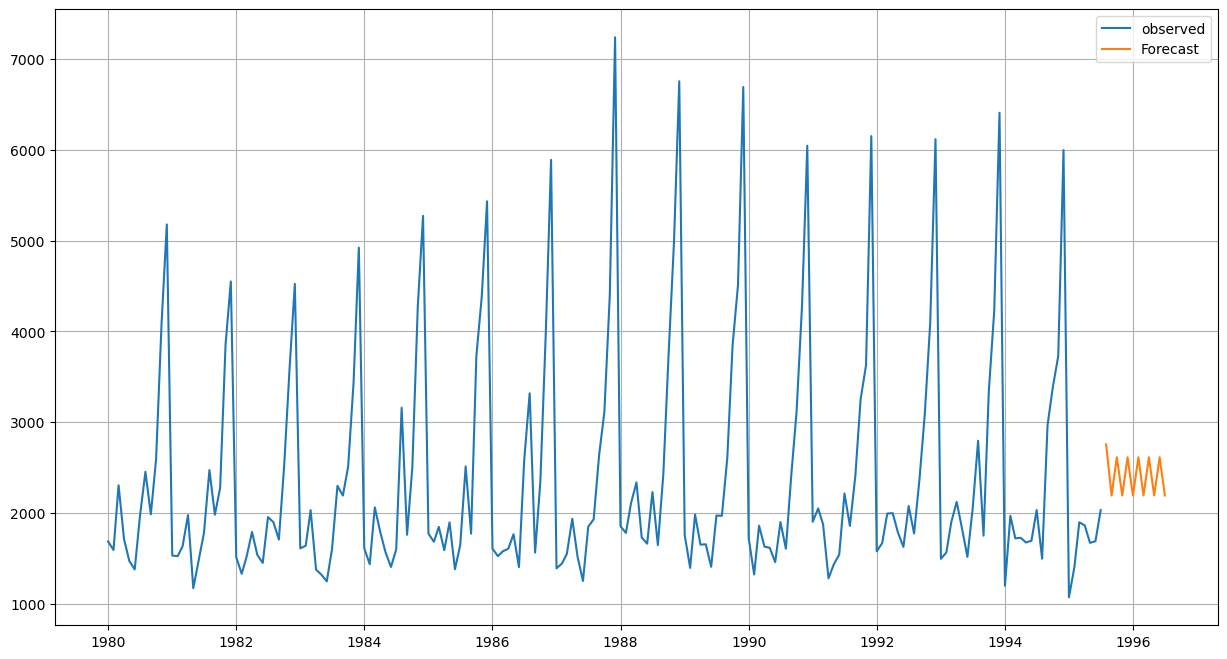

In [113]:
rcParams['figure.figsize'] = 15,8
plt.plot(df, label = 'observed')
plt.plot(ARIMA_model_final_pred, label = 'Forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [8]:
#SARIMA 

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [432]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [433]:
SARIMA_AIC_list = []


In [434]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train,
                                                     order=param,
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)

            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            
           
            SARIMA_AIC_df = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})
            SARIMA_AIC_list.append(SARIMA_AIC_df)

        except Exception as e:
            print(f"Error encountered for param={param}, seasonal_param={param_seasonal}: {e}")
            continue  


SARIMA_AIC = pd.concat(SARIMA_AIC_list, ignore_index=True)
print(SARIMA_AIC)

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1713.733427369893


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:1550.3636745816757


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:2518.055111489454
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:1549.9090611810107


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:1381.2808230305295


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:3922.4282316469444


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:1560.9524182160192


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:1546.3710345784998


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:2388.257713107534
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:1393.782425959013


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:1379.5255441564716


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:4072.495807003105


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:1389.2100461895902


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:1391.1413202301123


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:2466.8961334042942
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:1224.222458191389


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:1224.3195631380026


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:4258.602214923263


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:1705.542192212324


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:1539.9803442822315


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(1, 0, 3, 12) - AIC:3109.449862039341


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:1538.7006482968893


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:1368.4098260673563


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(1, 1, 3, 12) - AIC:3322.634866586413


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:1562.9556998755636


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:1534.5048253833897


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(2, 0, 3, 12) - AIC:3174.3371485029697


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:1395.6425810446926


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:1367.5675583143432


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(2, 1, 3, 12) - AIC:3248.809322395975


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(3, 0, 1, 12) - AIC:1394.5981769541083


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(3, 0, 2, 12) - AIC:1393.158307167639


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 0, 2)x(3, 0, 3, 12) - AIC:3204.504339810295
SARIMA(1, 0, 2)x(3, 1, 1, 12) - AIC:1226.0003799428573


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 2)x(3, 1, 2, 12) - AIC:1226.169912438221


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 2)x(3, 1, 3, 12) - AIC:3101.0515004183235


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(1, 0, 1, 12) - AIC:1692.1758993753042


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(1, 0, 2, 12) - AIC:1521.2803926282709


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 0, 3)x(1, 0, 3, 12) - AIC:2790.130833144414
SARIMA(1, 0, 3)x(1, 1, 1, 12) - AIC:1525.9981878243873


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(1, 1, 2, 12) - AIC:1354.297277109846


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 0, 3)x(1, 1, 3, 12) - AIC:3345.8846972700485


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(2, 0, 1, 12) - AIC:1566.9753747764162


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(2, 0, 2, 12) - AIC:1525.7387247385566


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 0, 3)x(2, 0, 3, 12) - AIC:4017.653542021503
SARIMA(1, 0, 3)x(2, 1, 1, 12) - AIC:1396.8307132824352


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(2, 1, 2, 12) - AIC:1354.4189585916524


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(2, 1, 3, 12) - AIC:3101.16920675414


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(3, 0, 1, 12) - AIC:1392.429119302875


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(3, 0, 2, 12) - AIC:1397.0021728713052


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 0, 3)x(3, 0, 3, 12) - AIC:4051.6565619142575
SARIMA(1, 0, 3)x(3, 1, 1, 12) - AIC:1227.3779851794832


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(3, 1, 2, 12) - AIC:1227.2662802376735


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 0, 3)x(3, 1, 3, 12) - AIC:1414.0037410975592


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1706.6940980038123


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1537.9253340980931


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3836.416856323913
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1540.1589398372903


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1370.1441691398018


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:3098.229465418185
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1552.24039404127


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1538.0472364234058


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3458.462644685022
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1383.7806678515353


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1371.482629267657


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:2498.884548600661
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1380.0239352208525


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1381.5879793210981


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3399.4227231685445
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:1211.9556442352941


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:1211.6779441684669


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:2836.529066528075
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1690.7536722096104


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1521.9494825158806


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3502.4890576032285
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1525.3967805868758


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1353.4841926774852


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:3188.8536745379265


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1551.3914190516898


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1521.737955862018


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3584.89804972109
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1381.7438076182434


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1353.6781531272932


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:2876.718832646691
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1378.9853656406501


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1383.5891231406044


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3551.8321562240953
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:1211.1332762403383


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:1211.1817894346032


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:3014.381362029763
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1678.4001547725027


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1508.6795571758532


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3253.8149067237805
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:1514.1055437031857


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:1341.525554740447


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:18.0


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1552.7909394114808


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1508.9332233752666


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2881.0957536415763
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:1383.722073294395


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:1341.3627895084821


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:5738.589759601433


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1380.3409685176625


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1381.8182163801778


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3347.2128463064923
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:1213.9747725526147


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:1213.9659771624997


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:5820.54553261529


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(1, 0, 1, 12) - AIC:1715.7334187129813


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(1, 0, 2, 12) - AIC:1551.8212292870671


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 1)x(1, 0, 3, 12) - AIC:16.0
SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:1551.8024338016949


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(1, 1, 2, 12) - AIC:1383.0793112730903


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(1, 1, 3, 12) - AIC:3598.468208372003


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:1548.8217455994272


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:1551.1906118369734


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 1)x(2, 0, 3, 12) - AIC:18.0
SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:1381.3124462351861


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(2, 1, 2, 12) - AIC:1381.4784085007773


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 1)x(2, 1, 3, 12) - AIC:3387.7026921127663
SARIMA(2, 0, 1)x(3, 0, 1, 12) - AIC:1381.4177406274907


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(3, 0, 2, 12) - AIC:1379.1490544748792


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 1)x(3, 0, 3, 12) - AIC:3101.769207086547
SARIMA(2, 0, 1)x(3, 1, 1, 12) - AIC:1211.9716247396398


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 1)x(3, 1, 2, 12) - AIC:1211.9693955672144


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 1)x(3, 1, 3, 12) - AIC:4203.549850372242
SARIMA(2, 0, 2)x(1, 0, 1, 12) - AIC:1702.7127711684122


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(1, 0, 2, 12) - AIC:1536.302585383991


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 2)x(1, 0, 3, 12) - AIC:3563.8703813362654
SARIMA(2, 0, 2)x(1, 1, 1, 12) - AIC:1538.9525680632746


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(1, 1, 2, 12) - AIC:1369.4045190281147


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 2)x(1, 1, 3, 12) - AIC:3506.3950519158834
SARIMA(2, 0, 2)x(2, 0, 1, 12) - AIC:1550.8013003973033


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(2, 0, 2, 12) - AIC:1536.287014123454


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 2)x(2, 0, 3, 12) - AIC:3509.8115506741647
SARIMA(2, 0, 2)x(2, 1, 1, 12) - AIC:1381.8415323931824


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(2, 1, 2, 12) - AIC:1368.8480279101734


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 2)x(2, 1, 3, 12) - AIC:3926.7829007388477
SARIMA(2, 0, 2)x(3, 0, 1, 12) - AIC:1383.1203423116694


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(3, 0, 2, 12) - AIC:1383.2584933264422


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 2)x(3, 0, 3, 12) - AIC:3612.2481180060054
SARIMA(2, 0, 2)x(3, 1, 1, 12) - AIC:1210.541129181891


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 2)x(3, 1, 2, 12) - AIC:1210.265559457011


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 2)x(3, 1, 3, 12) - AIC:4861.887356745771
SARIMA(2, 0, 3)x(1, 0, 1, 12) - AIC:1695.7945492182082


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 3)x(1, 0, 2, 12) - AIC:1525.8276524748694


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 3)x(1, 0, 3, 12) - AIC:2945.1513525223163
SARIMA(2, 0, 3)x(1, 1, 1, 12) - AIC:1527.3219970868697


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 3)x(1, 1, 2, 12) - AIC:1356.0370587008056


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 3)x(1, 1, 3, 12) - AIC:2945.550488827188
SARIMA(2, 0, 3)x(2, 0, 1, 12) - AIC:1552.735368707611


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 3)x(2, 0, 2, 12) - AIC:1525.796751229323


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 3)x(2, 0, 3, 12) - AIC:2839.266057231633
SARIMA(2, 0, 3)x(2, 1, 1, 12) - AIC:1383.9381695890295


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 3)x(2, 1, 2, 12) - AIC:1355.0286132992724


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 3)x(2, 1, 3, 12) - AIC:2224.356513710957
SARIMA(2, 0, 3)x(3, 0, 1, 12) - AIC:1380.1893988937773


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 3)x(3, 0, 2, 12) - AIC:1382.3109215873424


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 3)x(3, 0, 3, 12) - AIC:3063.2600739633326
SARIMA(2, 0, 3)x(3, 1, 1, 12) - AIC:1212.5620517448617


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 0, 3)x(3, 1, 2, 12) - AIC:1212.570912005949


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 0, 3)x(3, 1, 3, 12) - AIC:517.2780604520157
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1706.7535526413917


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1538.3451039658637


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2923.3973245612306


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1541.6657946395721


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1371.6411469830903


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:3125.3793899213133
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1538.7173777746923


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1538.265700303723


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3248.0811666390555
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1371.0185050264674


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1372.955984045892


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3166.522786095833
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1367.0874624230503


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1368.4868372797202


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2696.8823847192425


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:1199.4364328990312


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:1199.268834810526


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3060.013488115373
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1691.591993275831


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1523.5249463935634


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2740.557730351303
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1527.3799463524956


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1355.3791520935997


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:3647.518096234062
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1539.0422096149805


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1523.2178314455455


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3195.4103790582585
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1369.543827131691


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1355.665129299403


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:2959.771836175768
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1365.9996236634781


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1367.4332671127775


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3067.0155479957316
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:1199.0078543979116


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:1198.8823406297497


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:3498.133538008923
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1679.995162243381


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1507.7588775406784


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3354.289041965213
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:1511.4027290997672


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:1340.7186295827548


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:400.900604908934


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1540.9763128786594


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1508.694750365461


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3355.040147939
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:1366.450092807057


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:1336.1790583748218


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:22.0


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1381.7960443368497


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1368.7974581652777


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3234.335438839547
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:1195.9143680465213


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:1201.072286709829


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:24.0


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(1, 0, 1, 12) - AIC:1707.4321161200749


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(1, 0, 2, 12) - AIC:1550.0556261911106


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 1)x(1, 0, 3, 12) - AIC:2691.959889243098
SARIMA(3, 0, 1)x(1, 1, 1, 12) - AIC:1539.7991232260142


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(1, 1, 2, 12) - AIC:1384.3481972079558


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(1, 1, 3, 12) - AIC:3600.468208372003


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(2, 0, 1, 12) - AIC:1539.6003011079097


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(2, 0, 2, 12) - AIC:1541.0610941517257


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 1)x(2, 0, 3, 12) - AIC:3095.8387661965535
SARIMA(3, 0, 1)x(2, 1, 1, 12) - AIC:1368.4108763060583


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(2, 1, 2, 12) - AIC:1368.9438908604898


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 1)x(2, 1, 3, 12) - AIC:5397.457639318808
SARIMA(3, 0, 1)x(3, 0, 1, 12) - AIC:1364.1263949278177


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(3, 0, 2, 12) - AIC:1370.039060016871


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(3, 0, 3, 12) - AIC:3215.188846795438


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(3, 1, 1, 12) - AIC:1199.2187380314022


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 1)x(3, 1, 2, 12) - AIC:1199.3354757989848


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 1)x(3, 1, 3, 12) - AIC:5133.439694126432
SARIMA(3, 0, 2)x(1, 0, 1, 12) - AIC:1704.2439736964598


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 2)x(1, 0, 2, 12) - AIC:1538.3423196675276


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 2)x(1, 0, 3, 12) - AIC:3287.891714495929
SARIMA(3, 0, 2)x(1, 1, 1, 12) - AIC:1540.866151517972


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 2)x(1, 1, 2, 12) - AIC:1371.3815584366937


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 2)x(1, 1, 3, 12) - AIC:3722.896818541301
SARIMA(3, 0, 2)x(2, 0, 1, 12) - AIC:1537.1130123411951


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 2)x(2, 0, 2, 12) - AIC:1538.0081123839868


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 2)x(2, 0, 3, 12) - AIC:3356.5572808248785
SARIMA(3, 0, 2)x(2, 1, 1, 12) - AIC:1366.7592544649458


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 2)x(2, 1, 2, 12) - AIC:1370.769974513021


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 2)x(2, 1, 3, 12) - AIC:3228.93456506036
SARIMA(3, 0, 2)x(3, 0, 1, 12) - AIC:1366.177703315612


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 2)x(3, 0, 2, 12) - AIC:1374.2457212801583


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 2)x(3, 0, 3, 12) - AIC:3391.962712101275
SARIMA(3, 0, 2)x(3, 1, 1, 12) - AIC:1195.824179884991


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 2)x(3, 1, 2, 12) - AIC:1198.3994279721196


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 2)x(3, 1, 3, 12) - AIC:3459.8178830409506
SARIMA(3, 0, 3)x(1, 0, 1, 12) - AIC:1693.982337035485


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 3)x(1, 0, 2, 12) - AIC:1522.8465418204466


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 3)x(1, 0, 3, 12) - AIC:2982.993828285009
SARIMA(3, 0, 3)x(1, 1, 1, 12) - AIC:1526.5449897499211


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 3)x(1, 1, 2, 12) - AIC:1356.7314200250087


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 3)x(1, 1, 3, 12) - AIC:22.0
SARIMA(3, 0, 3)x(2, 0, 1, 12) - AIC:1541.7483963430398


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 3)x(2, 0, 2, 12) - AIC:1525.5567493711142


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 3)x(2, 0, 3, 12) - AIC:3126.4934515863797
SARIMA(3, 0, 3)x(2, 1, 1, 12) - AIC:1372.6109800595034


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 3)x(2, 1, 2, 12) - AIC:1357.0511523008454


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(2, 1, 3, 12) - AIC:24.0


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 3)x(3, 0, 1, 12) - AIC:1369.6044265038934


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 3)x(3, 0, 2, 12) - AIC:1366.6872862193673


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 0, 3)x(3, 0, 3, 12) - AIC:3455.406048294128
SARIMA(3, 0, 3)x(3, 1, 1, 12) - AIC:1197.6611786161197


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 0, 3)x(3, 1, 2, 12) - AIC:1199.9487638249227


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 0, 3)x(3, 1, 3, 12) - AIC:26.0


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1693.7984305939922


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1539.7997634058795


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3336.1775311768424


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:1529.081234982563


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:1372.9100328219004


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:3127.132149824816
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1526.4129863366354


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1527.7060720897794


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3250.081166648441
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:1356.207053484421


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:1357.9175212305383


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:2790.134819668904
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1352.5069619164137


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1353.713089015127


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2617.555767942605
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:1186.9051756989325


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:1187.0166920090433


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:2788.8441553125194
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1693.8352568262326


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1525.4009188913337


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3609.9964360518616


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:1528.6864814053229


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:1356.9391160222012


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:3087.145201733


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1526.089662441263


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1525.401886621697


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3850.9824262671386
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:1355.4394194010397


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:1357.2659845776327


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:1882.0042376559645
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1352.3463315971608


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1378.0256182591204


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3901.541851357268
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:1186.6690809781392


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:1186.6084033095517


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:2805.255903575002
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1674.14123778938


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1507.4405256264617


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3134.972651345653
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:1514.5417486181993


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:1343.0306912375872


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:3631.9390924010736
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1528.1781707463485


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1512.6530690308236


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3565.347430205251


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:1353.4587085330813


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:1338.1462265043383


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:2554.2368062389864
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1349.7054684452623


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1359.627437314043


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_mode

SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2039.5437408267758
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:1184.2010965018235


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:1185.0196032671533


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:3481.3253196624255
         param       seasonal          AIC
0    (1, 0, 1)  (1, 0, 1, 12)  1713.733427
1    (1, 0, 1)  (1, 0, 2, 12)  1550.363675
2    (1, 0, 1)  (1, 0, 3, 12)  2518.055111
3    (1, 0, 1)  (1, 1, 1, 12)  1549.909061
4    (1, 0, 1)  (1, 1, 2, 12)  1381.280823
..         ...            ...          ...
319  (3, 1, 3)  (3, 0, 2, 12)  1359.627437
320  (3, 1, 3)  (3, 0, 3, 12)  2039.543741
321  (3, 1, 3)  (3, 1, 1, 12)  1184.201097
322  (3, 1, 3)  (3, 1, 2, 12)  1185.019603
323  (3, 1, 3)  (3, 1, 3, 12)  3481.325320

[324 rows x 3 columns]


In [436]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True)

,param,seasonal,AIC
110,"(2, 0, 1)","(1, 0, 3, 12)",16.000000
95,"(1, 1, 3)","(1, 1, 3, 12)",18.000000
116,"(2, 0, 1)","(2, 0, 3, 12)",18.000000
257,"(3, 0, 3)","(1, 1, 3, 12)",22.000000
209,"(2, 1, 3)","(2, 1, 3, 12)",22.000000
...,...,...,...
143,"(2, 0, 2)","(3, 1, 3, 12)",4861.887357
233,"(3, 0, 1)","(3, 1, 3, 12)",5133.439694
227,"(3, 0, 1)","(2, 1, 3, 12)",5397.457639
101,"(1, 1, 3)","(2, 1, 3, 12)",5738.589760


In [114]:
# Building SARIMA model with best parameters - (2,0,1)(1,0,3,12)
import statsmodels.api as sm

best_SARIMA_model = sm.tsa.statespace.SARIMAX(train,order = (2,0,1),seasonal_order=(1,0,3,12), enforce_stationary= True)
best_SARIMA_results = best_SARIMA_model.fit()

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoreg

In [115]:
print(best_SARIMA_results.summary().tables[0])
print(best_SARIMA_results.summary().tables[1])

                                         SARIMAX Results                                          
Dep. Variable:                                  Sparkling   No. Observations:                  130
Model:             SARIMAX(2, 0, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood               -1063.971
Date:                                    Sat, 20 Apr 2024   AIC                           2143.942
Time:                                            14:35:45   BIC                           2166.882
Sample:                                        01-01-1980   HQIC                          2153.263
                                             - 10-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6373      2.274      0.720      0

In [116]:
SARIMA_pred = best_SARIMA_results.forecast(steps=len(test))
SARIMA_pred

1990-11-01    4022.858556
1990-12-01    5751.414168
1991-01-01    1559.088360
1991-02-01    1312.915522
1991-03-01    1728.486460
1991-04-01    1577.718941
1991-05-01    1510.878989
1991-06-01    1342.251983
1991-07-01    1799.350536
1991-08-01    1809.352292
1991-09-01    2166.433581
1991-10-01    2900.853427
1991-11-01    3829.272494
1991-12-01    5447.131328
1992-01-01    1518.071436
1992-02-01    1325.138744
1992-03-01    1684.625244
1992-04-01    1581.884790
1992-05-01    1470.447713
1992-06-01    1311.782151
1992-07-01    1759.822244
1992-08-01    1820.383247
1992-09-01    2051.972453
1992-10-01    2787.344206
1992-11-01    3734.071146
1992-12-01    5255.501512
1993-01-01    1487.400578
1993-02-01    1315.164401
1993-03-01    1654.221910
1993-04-01    1558.779448
1993-05-01    1441.905072
1993-06-01    1283.183415
1993-07-01    1728.065038
1993-08-01    1827.303626
1993-09-01    1994.152975
1993-10-01    2742.717756
1993-11-01    3665.546915
1993-12-01    5151.134756
1994-01-01  

In [117]:
rmse_best_SARIMA = metrics.mean_squared_error(test,SARIMA_pred, squared = False)
print("Best SARIMA forecast rmse (2,0,1)(1,0,3,12)",round(rmse_best_SARIMA))

best_SARIMA = pd.DataFrame({'Test RMSE': [rmse_best_SARIMA]}
                           ,index=['Best SArima forecast rmse'])

Results = pd.concat([Results, best_SARIMA])
Results

Best SARIMA forecast rmse (2,0,1)(1,0,3,12) 455


,Test RMSE
Regression on Time,1392.438305
Simple Average,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
5pointTrailingMovingAverage,1276.589323
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1412.787236
alpha 0.068 SES model,1363.703915
DES model,1468.015409
TES model add,377.435453


In [120]:
# Predicting forecast for next 12 month using SARIMA - (2,0,1)(1,0,3,12)

Manual_SARIMA_model = sm.tsa.statespace.SARIMAX(df,order = (2,0,1),seasonal_order=(1,0,3,12), enforce_stationary= True)
Manual_SARIMA_results = Manual_SARIMA_model.fit()
Manual_SARIMA_pred = Manual_SARIMA_results.forecast(steps = 12)
Manual_SARIMA_pred


C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_stationary']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoreg

1995-08-01    1810.760355
1995-09-01    2547.050757
1995-10-01    3032.827387
1995-11-01    3385.411062
1995-12-01    5163.387022
1996-01-01    1240.114867
1996-02-01    1524.735175
1996-03-01    1787.201453
1996-04-01    1604.823264
1996-05-01    1496.959707
1996-06-01    1552.316650
1996-07-01    1850.164894
Freq: MS, Name: predicted_mean, dtype: float64

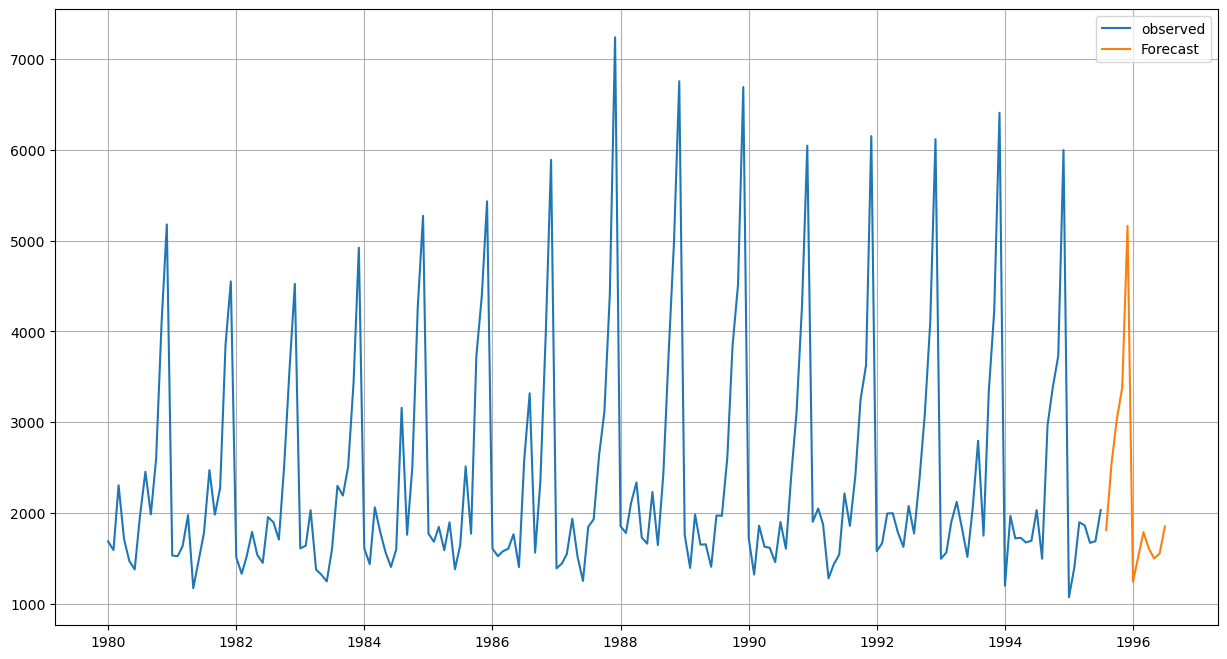

In [121]:
rcParams['figure.figsize'] = 15,8
plt.plot(df, label = 'observed')
plt.plot(Manual_SARIMA_pred, label = 'Forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [122]:
#Building Final model using Third Exponential Smoothing (Additive trend) with lowest RMSE - 377.45

Final_Model_TES = ExponentialSmoothing(df,trend = 'additive', seasonal = 'additive', initialization_method = 'estimated')
Final_Model = Final_Model_TES.fit()
print(Final_Model.params)

C:\Users\vmahin01\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.07596713833847582, 'smoothing_trend': 0.03256922042142542, 'smoothing_seasonal': 0.37660763013263704, 'damping_trend': nan, 'initial_level': 2356.500976792558, 'initial_trend': -1.0362742462267969, 'initial_seasons': array([-636.25317961, -723.00028675, -398.67051497, -473.45456398,
       -808.43195611, -815.36867317, -384.24769271,   72.9999949 ,
       -237.46126013,  272.34548254, 1541.39087625, 2590.11216133]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [123]:
Final_Model_pred = Final_Model.forecast(steps=12)
Final_Model_pred

1995-08-01    1877.418973
1995-09-01    2405.272289
1995-10-01    3242.091582
1995-11-01    3922.174721
1995-12-01    6118.486885
1996-01-01    1262.602775
1996-02-01    1592.120997
1996-03-01    1831.635313
1996-04-01    1806.451718
1996-05-01    1651.704099
1996-06-01    1586.487882
1996-07-01    1976.989421
Freq: MS, dtype: float64

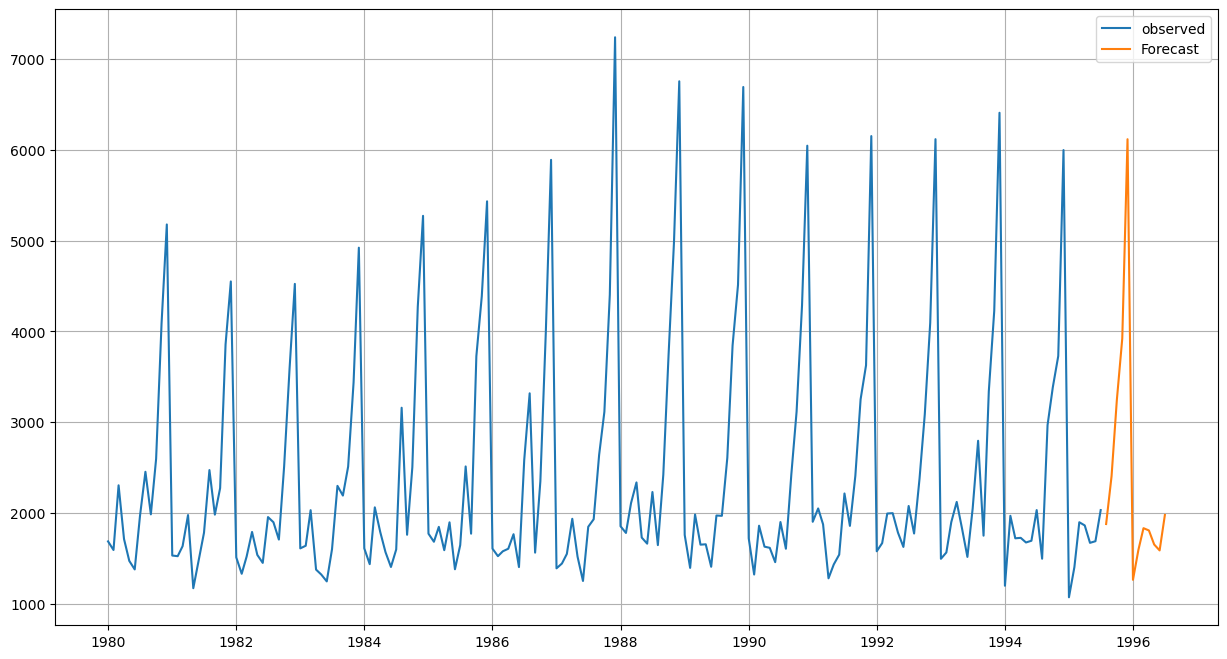

In [124]:
rcParams['figure.figsize'] = 15,8
plt.plot(df, label = 'observed')
plt.plot(Final_Model_pred, label = 'Forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

THE END